<h2>Important Note:</h2>
<ul>
    <li>Numerical Features are the ones whose level of measurement are of either 'Interval' or 'Ratio' level.</li>
    <li>Categorical Features are the ones whose level of measurement are of either 'Nominal' or 'Ordinal' level. </li>
    <li>Pearson's Correlation is used to determine the important numerical features for a numerical feature and it gives the numerical features which might be significant predictors of that numerical feature.</li>
    <li>ANOVA is used to determine the important categorical features for a numerical feature. Hence, it gives the categorical features which might be significant predictors of that numerical feature.  </li>
    </ul>

<h3>Importing relevant libraries:</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')

In [65]:
data = pd.read_csv('marketing_data.csv')

<h3>Section 1:</h3>

In [66]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [68]:
# Preprocessing some features:

data['Age'] = 2020-data['Year_Birth'] # compute Age of customers
data['Income'] = data[' Income '] # 'Income' has some leading and trailing spaces, thus to remove them
date_customer = list(data['Dt_Customer'])
data = data.drop(['ID', 'Year_Birth', ' Income ', 'Dt_Customer'], axis=1)

# Distinguishing categorical features and numerical features so that our
# analysis becomes easier.
num_feat = [feat for feat in data.columns if len(data[feat].unique()) > 10]
cat_feat = [feat for feat in data.columns if len(data[feat].unique()) <= 10]

In [69]:
# verifying whether all of the features are didvided properly into categorical and numerical ones. 

all_feat = len(set(num_feat).union(set(cat_feat)))
data_feat = len(data.columns)
print(all_feat, 'should be equal to ', data_feat)

26 should be equal to  26


<h3>Missing Values:</h3>
<p>Finding and dealing with missing values is an important prerequisite for modelling data and is an essential part of data cleansing.</p>

In [70]:
# finding missing values in the data:
data.isnull().sum()

Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Age                     0
Income                 24
dtype: int64

<p>As we can see from the above, there are missing values present only in <strong> numerical feature 'Income': 24 missing values are present </strong>, rest all of the features have the complete data and hence, we can move ahead with understanding the relationship between the 'Income' and other numerical-categorical features.</p>

In [71]:
# Preprocessing of 'Income' feature since it contains '$' and ',' and thus 
# cannot be converted into float:

lst_income = []
for elem in list(data['Income'].values):
    if str(elem).strip() == 'nan':
        lst_income.append('nan')
    else:
        float_income_elem = float((elem).replace('$', '').replace(',', ''))
        lst_income.append(float_income_elem)

        
data['Income'] = lst_income
data['Income'] = data['Income'].astype('float')

# Since we know the Income scales up to very large values and to maintain the scaling, I would like
# to create an additional feature i.e. 'log_income' which is nothing but the logarithmic transformation
# applied to the original values of Income:

data['log_income'] = np.where(data['Income'].notnull(), np.log(data['Income']), 'nan')

Text(0.5, 1.0, 'Boxplot of Income($)')

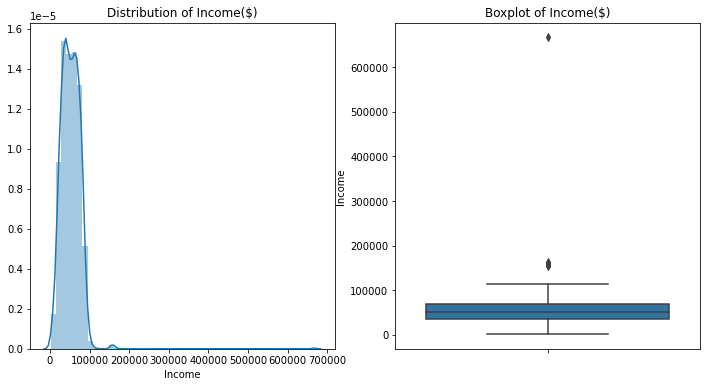

In [32]:
# Plotting the Distribution and Boxplots of 'Income'

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(data['Income'])
plt.title('Distribution of Income($)')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Income'])
plt.title('Boxplot of Income($)')

<p>The numerical feature <strong>'Income' seems to have right skewed distribution of data which suggests that most of customers of this market have salary around 50,000 currency (median),</strong> thus it can be inferred that most of the customers have limited budget. From the 2nd figure, it seems that there are a few of the outliers in the data,<strong> which occur towards the upper whisker of boxplot, since most of the customers have limited income, thus the once who have higher income are considered as outliers (to suggest a business objective: since most of the customers have low income, hence the expensive lot of products would be sold less often, thus further investigate the consumption of expensive products by the customers?)</strong> </p>

<h3>Correlation Analysis:</h3>
<p>Correlation Analysis is done so as to investigate the numerical features which are highly correlated or uncorrelated with another numerical feature. Right now, our target feature is 'Income' and we need to compute certain important features which are quite correlated to the target feature.</p>

In [33]:
# finding the numerical features which are higly correlated with 'Income':
# Pearson's Correlation is a nice way to choose the numerical features

def find_highly_corr_feat(feat, num_features, threshold):
    corr_feat = {} # contains the feature and its correlation coefficient
    corr_mat = data[num_features].corr() # correlation matrix
    corr_with_others = corr_mat[feat] # correlation with respect to the feature we want to compute
    for idx in range(len(num_features)): #(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
        if corr_with_others.values[idx] > threshold and corr_with_others.values[idx]!=1:
            corr_feat[corr_with_others.index[idx]] = corr_with_others.values[idx]
    return corr_feat 

# I consider 0.3 to be the threshold of correlation:
corr_feat_incm = find_highly_corr_feat('Income', num_feat, 0.3)
corr_feat_incm

{'MntWines': 0.5786497501367389,
 'MntFruits': 0.4308416809908727,
 'MntMeatProducts': 0.5846333567663226,
 'MntFishProducts': 0.4388713594516389,
 'MntSweetProducts': 0.4407437915193688,
 'MntGoldProds': 0.32591644649726664,
 'NumWebPurchases': 0.38787781129179416,
 'NumCatalogPurchases': 0.589162441934327,
 'NumStorePurchases': 0.5293621402734155}

<p>There is no logic of choosing a particular threshold. The higher the correlation, the better it is, but in 'Income', the highest correlation is 0.57. Now, we need to consider a particular threshold of correlation such that  only those numerical features would be chosen which have correlation higher than the threshold with respect to the numerical feature under consideration. This would help us getting the numerical features which have some impact on the numerical feature under consideration.</p>
<p><strong>The way I would deal with missing values is by creating a Regression model using the best numerical and categorical features.<ul><li>A regression model will be built which would be trained with the best selected predictors for target feature 'Income' and since we only have 24 values missing, hence the data corresponding to those 24 missing values will be Test Data and rest will be traeted as training data, thus we have enough data to train a regression model.</li> <li>Using Correlation, I would like to consider the best numerical features which have higher correlation than the assigned threshold.</li> <li>Using One-Way ANOVA (which gives the same result for T-test i.e. when only 2 categories are present in the categorical feature), I would like to consider the best categorical features which explain the variance of 'Income'</li> 
<li>T-test and ANOVA assumes that the population distribution of numerical features should be normally distributed. According to Central Limit Theorem, if sample size> 30, then irrespective of the sample distribution, the population distribution of Sample Means will be normally distributed. However, since we have a sample data which has sample size greater than 30 thus we can apply t-test and ANOVA since the sample means will have normal distribution. The only thing that we need to care  for are the outliers. </li></ul></strong></p>

<h3>Investigating the Distribution and Outliers in each of the Numerical Feature:</h3>

In [74]:
# finding the upper and lower threshold for outliers:
def compute_outliers(data, feature):
    q1 = np.percentile(data[feature], q=25)
    q3 = np.percentile(data[feature], q=75)
    iqr = q3-q1
    low_th = q1 - 1.5*iqr
    upp_th = q3 + 1.5*iqr
    return (low_th, upp_th)

# Cumulative Density Function: It tells us what proportion of people fall within a certain value:
def cum_density_func(data, feature):
    per_list = []
    for percent in np.arange(0.01, 1, 0.01):
        per_list.append(np.percentile(data[feature], q=percent*100))
    
    return per_list 

# plotting the boxplots, distribution of num feat and a line corresponding to the upper and lower threshold:
def outliers_plot(data, feature, low_th, upp_th):
    plt.figure(figsize=(15, 7))
    
    # plot the distribution of the feature:
    plt.subplot(1, 3, 1);
    plt.grid(True, alpha=0.4)
    sns.distplot(data[feature])
    plt.vlines(low_th, 0.00, 0.005, color='maroon', linestyles='dashed')
    plt.vlines(upp_th, 0.00, 0.005, color='maroon', linestyles='dashed')
    plt.title('Distribution')
    
    # plotting the boxplot:
    plt.subplot(1, 3, 2);
    sns.boxplot(y=feature, data=data)
    plt.title('Boxplot')
    
    # plotting the cumulative distribution function:
    per_list = cum_density_func(data, feature)
    plt.subplot(1, 3, 3);
    plt.grid(True, alpha=0.4)
    plt.plot(per_list, np.arange(0.01, 1, 0.01), color='k', linewidth=3)
    plt.fill_between(per_list, np.arange(0.01, 1, 0.01), color='orange')
    plt.xlabel(feature)
    plt.ylabel('Percentiles of Customers')
    plt.title('Cum. Density Func.')
    

# combining the above two functions into one
def find_outliers(data, feature, thresholds=False):
    (low_th, upp_th) = compute_outliers(data, feature)
    count_low_th = data[data[feature] < low_th]['Recency'].count()
    count_upp_th = data[data[feature] > upp_th]['Recency'].count()
    total_outliers = count_low_th + count_upp_th
    print('Range of {} is ---> {} to {}'.format(feature, min(data[feature]), max(data[feature])))
    print('Proportion of Outliers towards lower tail ->', (count_low_th/len(data)) *100, '%')
    print('Proportion of Outliers towards upper tail->', (count_upp_th/len(data)) *100, '%')
    print('Total Proportion of Outliers->', (total_outliers/len(data)) *100, '%')
    outliers_plot(data, feature, low_th, upp_th)
    
    # if you want ot get the values of lower and upper thresholds:
    if thresholds == True:
        return (low_th, upp_th)
    else:
        return 'Successfully Accessed'

Range of NumStorePurchases is ---> 0 to 13
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.0 %
Total Proportion of Outliers-> 0.0 %


'Successfully Accessed'

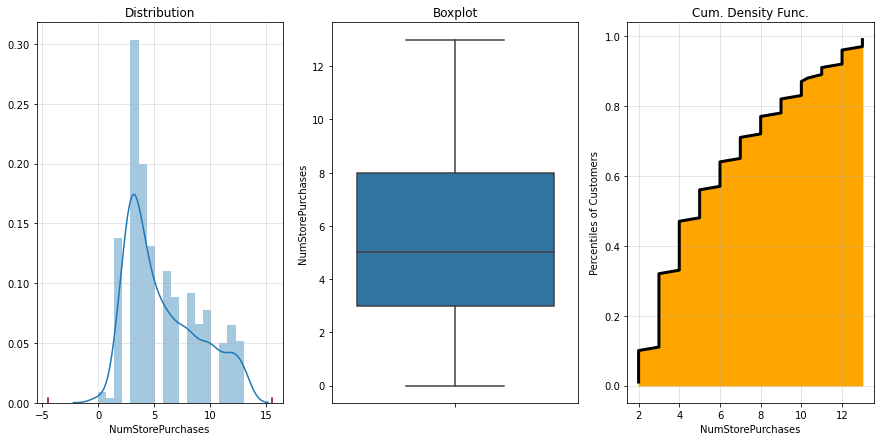

In [35]:
find_outliers(data, 'NumStorePurchases')

<p>It can be observed that 60% percent of people buy less than 6 number of products from the Store. From the distribution also, we can infer that most of the customers who go to store and buy products lying in the range of 2 to 5. Thus, it can be concluded that the customers who buy from the Store are more likely to purchase less amount of products since it might become heavy for them to carry.</p>

Range of NumWebPurchases is ---> 0 to 27
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.17857142857142858 %
Total Proportion of Outliers-> 0.17857142857142858 %


'Successfully Accessed'

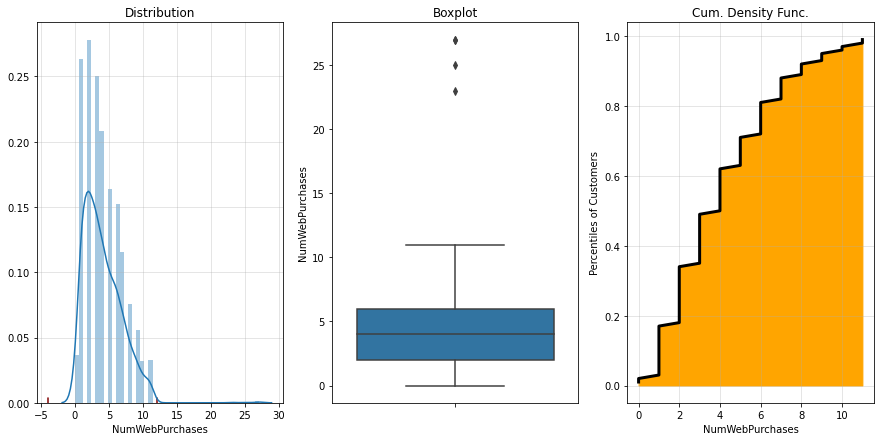

In [36]:
find_outliers(data, 'NumWebPurchases')

Range of NumCatalogPurchases is ---> 0 to 28
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 1.0267857142857142 %
Total Proportion of Outliers-> 1.0267857142857142 %


'Successfully Accessed'

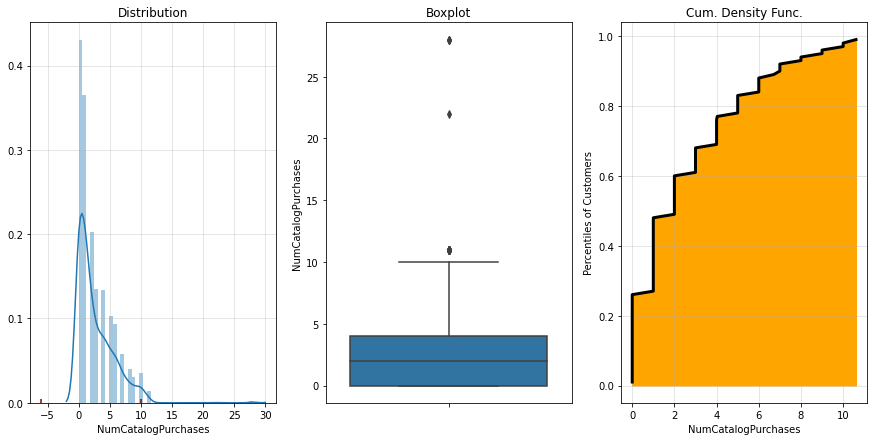

In [37]:
find_outliers(data, 'NumCatalogPurchases')

Range of NumDealsPurchases is ---> 0 to 15
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 3.8392857142857144 %
Total Proportion of Outliers-> 3.8392857142857144 %


'Successfully Accessed'

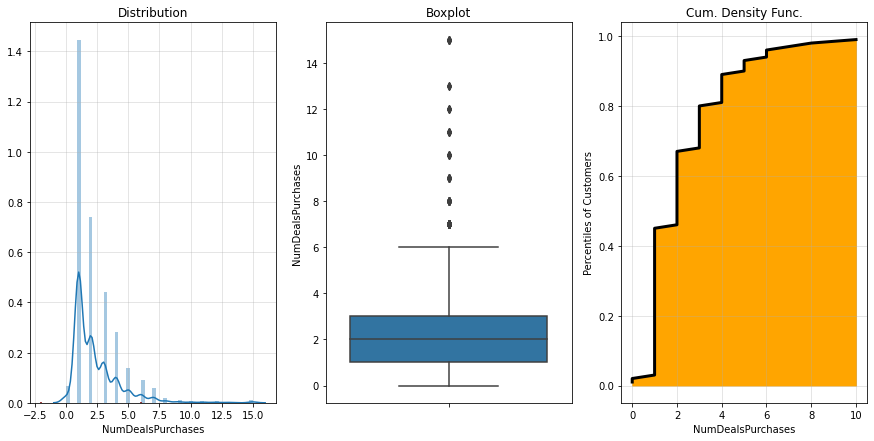

In [38]:
find_outliers(data, 'NumDealsPurchases')

Range of NumWebVisitsMonth is ---> 0 to 20
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.35714285714285715 %
Total Proportion of Outliers-> 0.35714285714285715 %


'Successfully Accessed'

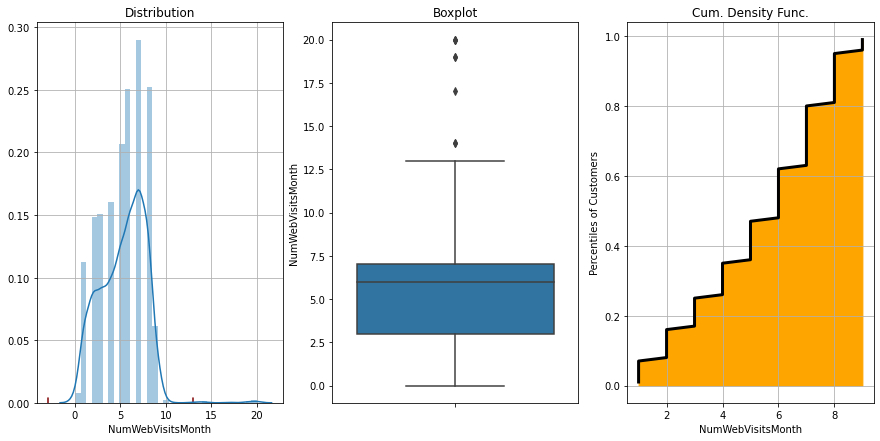

In [16]:
find_outliers(data, 'NumWebVisitsMonth')

Range of Recency is ---> 0 to 99
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.0 %
Total Proportion of Outliers-> 0.0 %


'Successfully Accessed'

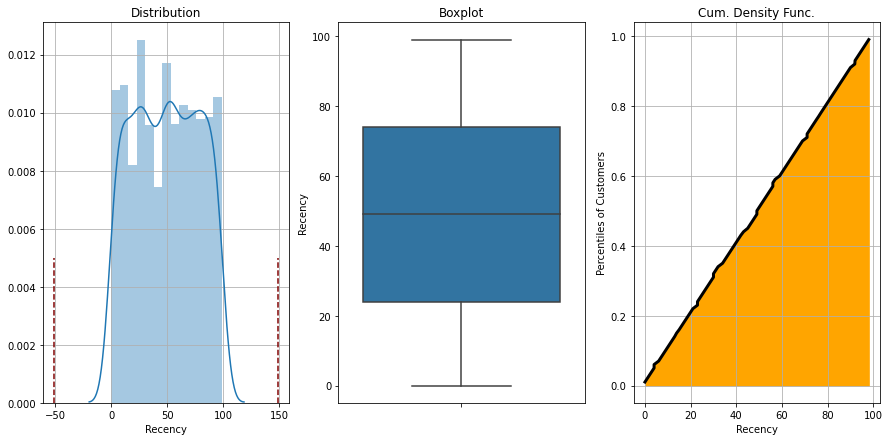

In [17]:
# 'Recency means the number of days since the customer has last purchase'
find_outliers(data, 'Recency')

<p>
<ul>
    <li>'Recency seems to have uniform distribution, which means that we have equal proportion of customers from all the bins of 'Recency'.</li>
    <li>No outliers are there.</li>
    </ul>
<p>

Range of MntWines is ---> 0 to 1493
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 1.5625 %
Total Proportion of Outliers-> 1.5625 %


'Successfully Accessed'

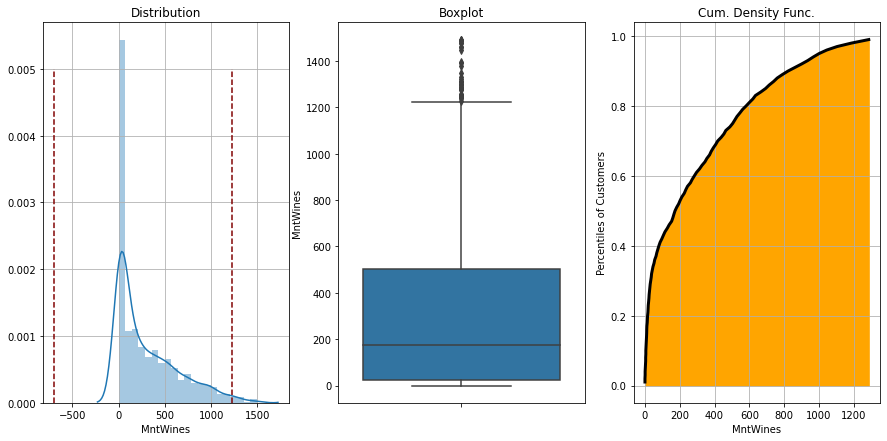

In [18]:
'MntWines means the amount of money spent on wines'
find_outliers(data, 'MntWines')

In [19]:
# customers who spend less than 20 dollars in wines
len(data[data['MntWines'] < 100])

947

<p><ul>
<li>'MntWines' has right skewed distribution and quite less outliers i.e. 1.562% of total data towards the upper whisker. <strong>We can use 'Winsorizing' to deal with the outliers since the outliers are less than 5%.</strong></li>
    <li>From CDF, we can observe that less than 60% of the total customers have spent 250 dollars on Wines. Hence, it means that we do not a lot of customers who spend a lot in Wine. This indicates out customers tend to spend quite less on Wine.</li>
    <li> Half of the population of the customers spend less than 100 for wines .</li>
    <li>At the same time, we have certain customers who spend a lot on wines also, but the proportion of those customers is pretty less.</li>
</ul></p>

Range of MntFruits is ---> 0 to 199
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 10.133928571428571 %
Total Proportion of Outliers-> 10.133928571428571 %


'Successfully Accessed'

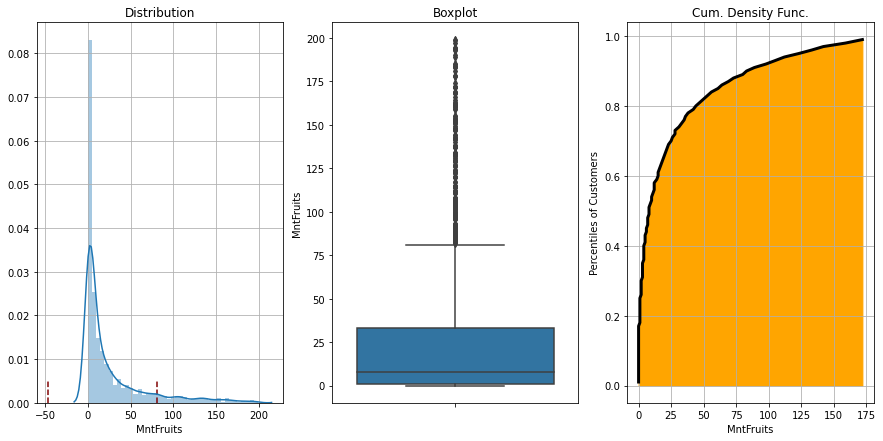

In [20]:
find_outliers(data, 'MntFruits')

In [21]:
# number of customers who spend less than 10 dollars in Fruits:
len(data[data['MntFruits'] < 10])

1179

<p><ul>
<li>'MntFruits' has right skewed distribution and quite large outliers i.e. 10.133% of total data towards the upper whisker. <strong>We can use ''Log. Transformation to deal with the outliers since the outliers are pretty large.</strong></li>
    <li>From CDF, we can observe that less than 80% of the total customers have spent $50 on Fruits. Fruits also tend to be cheap. This indicates our customers tend to spend less on Fruits as well. This also might be because buying a lot fruits in bulk may result in getting rotten.</li>
    <li>50 percent of the customers spend less than 10 dollars in fruits and this means they tend to buy very less fruits.</li>
</ul></p>

Range of MntMeatProducts is ---> 0 to 1725
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 7.8125 %
Total Proportion of Outliers-> 7.8125 %


'Successfully Accessed'

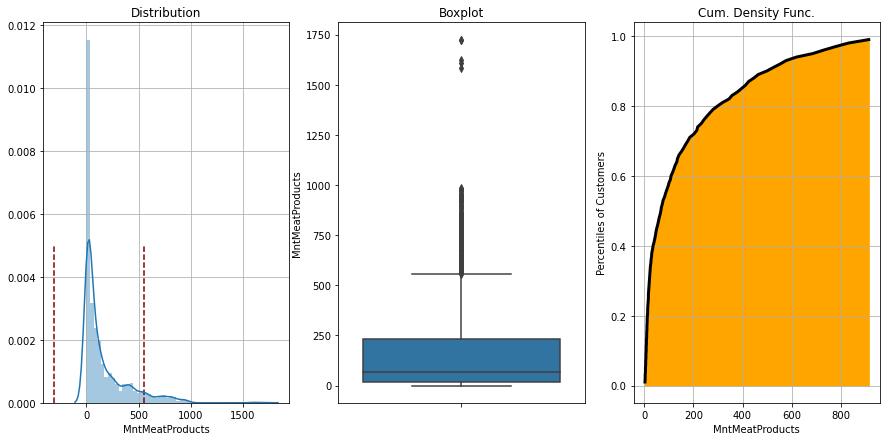

In [22]:
find_outliers(data, 'MntMeatProducts')

In [23]:
# number of customers who spend less than 50 dollars in Meat Products:
len(data[data['MntMeatProducts'] < 50])

1002

<p><ul>
<li>'MntMeatProducts' has right skewed distribution and large enough outliers i.e. 7.8125% of total data towards the upper whisker. <strong>We can use ''Log. Transformation to deal with the outliers since the outliers are pretty large.</strong></li>
    <li>From CDF, we can observe that less than 75% of the total customers have spent $200 on MeatProducts. Meat is generally expensive.</li>
    <li>50 percent of customers tend to spend less than 50 dollars for Meat and this again shows a high rate of customers not willing to pay much on Meat. There are 5 customers who pay more than 1000 dollars for Meat and they seem to be outliers for our data.</li>
</ul></p>

Range of MntFishProducts is ---> 0 to 259
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 9.955357142857142 %
Total Proportion of Outliers-> 9.955357142857142 %


'Successfully Accessed'

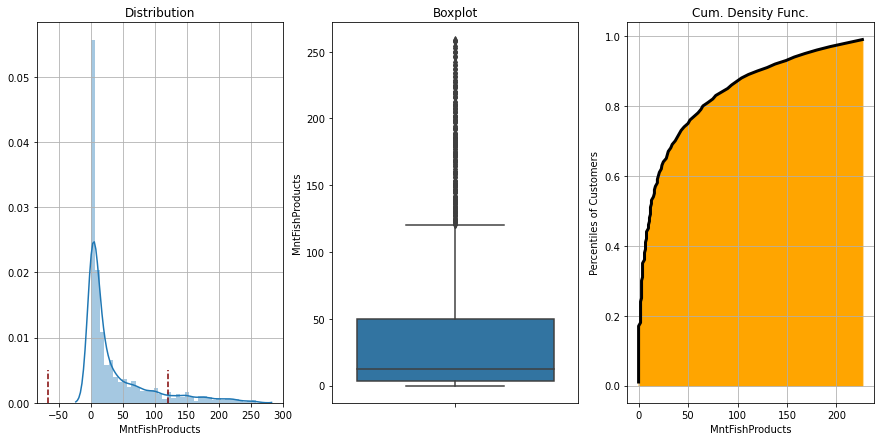

In [24]:
find_outliers(data, 'MntFishProducts')

In [25]:
# number of customers who spend less than 10 dollars in Fish Products:
len(data[data['MntFishProducts'] < 10])

995

<p><ul>
<li>'MntFishProducts' has right skewed distribution and pretty large outliers i.e. 9.95% of total data towards the upper whisker. <strong>We can use ''Log. Transformation to deal with the outliers since the outliers are pretty large.</strong></li>
    <li>From CDF, we can observe that less than 77% of the total customers have spent $50 on Fish.</li>
    <li>Around half of the customers pay less than 10 dollars for Fish Products. All the customers seems to pay less for Fish Products.</li>
</ul></p>

Range of MntSweetProducts is ---> 0 to 263
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 11.071428571428571 %
Total Proportion of Outliers-> 11.071428571428571 %


'Successfully Accessed'

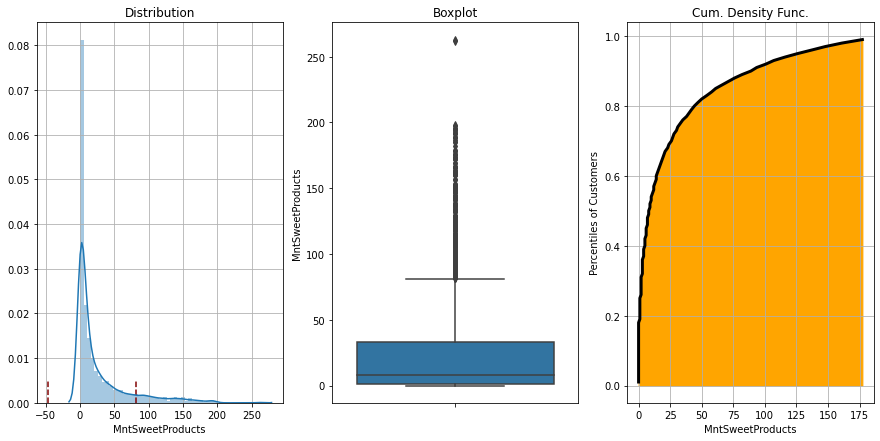

In [26]:
find_outliers(data, 'MntSweetProducts')

In [27]:
# number of customers who spend less than 10 dollars in Sweet Products:
len(data[data['MntSweetProducts'] < 10])

1175

<p><ul>
<li>'MntSweetProducts' has right skewed distribution and very large outliers i.e. 11.071% of total data towards the upper whisker. <strong>We can use ''Log. Transformation to deal with the outliers since the outliers are pretty large.</strong></li>
    <li>From CDF, we can observe that less than 83% of the total customers have spent $50 on Fruits. It means pur customers do not spend more on sweets and they purchase in quite less amounts.</li>
    <li>More than half of the customers pay less than 10 dollars for buying Sweets. All the customers seems to pay less for Sweet Products.</li>
</ul></p>

Range of MntGoldProds is ---> 0 to 362
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 9.241071428571429 %
Total Proportion of Outliers-> 9.241071428571429 %


'Successfully Accessed'

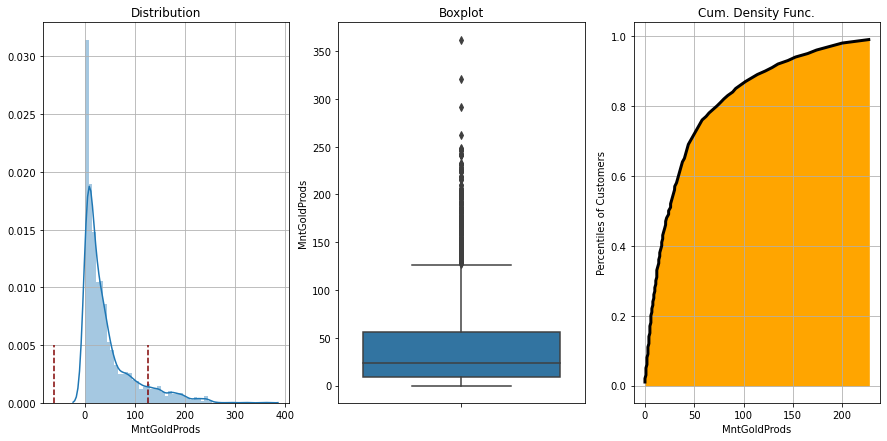

In [28]:
find_outliers(data, 'MntGoldProds')

In [29]:
# number of customers who spend less than 21 dollars in Gold Products:
len(data[data['MntGoldProds'] < 21])

1030

<p><ul>
<li>'MntGoldProds' has right skewed distribution and quite large outliers i.e. 9.241% of total data towards the upper whisker. <strong>We can use ''Log. Transformation to deal with the outliers since the outliers are pretty large.</strong></li>
    <li>From CDF, we can observe that less than 75% of the total customers have spent $50 on MntGoldProds. This also means that customers do not spend a lot on buying gold products since the max amount spent by one of the customers is 362 dollars.</li>
    <li>Almost half of the customers pay less than 20 dollars for buying Gold Products.</li>
</ul></p>

<p><ul>
<li> 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' and 'MntGoldProducts' <strong> all have right skewed distribution, with outliers more than 8% in each of them. </strong></li>
    <li><strong>In order to deal with the outliers for the above numerical features we need to use logarithmic transformation</strong> which reduces the spread of data and shrinks it to a lower scale.</li>
    <li><strong>An average customer of the market pays: 
        <ol> 
            <li>Less than 100 dollars for Wines.</li> 
            <li>Less than 10 dollars for Fruits.</li> 
            <li>Less than 50 dollars for MntMeatProducts.</li> 
            <li>Less than 10 dollars for Fish.</li> 
            <li>Less than 10 dollars for Sweet Products.</li> 
            <li>Less than 20 dollars for Gold Products.</li> 
        </ol>
        </strong></li>
</ul></p>

Range of Age is ---> 24 to 127
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.13392857142857142 %
Total Proportion of Outliers-> 0.13392857142857142 %


'Successfully Accessed'

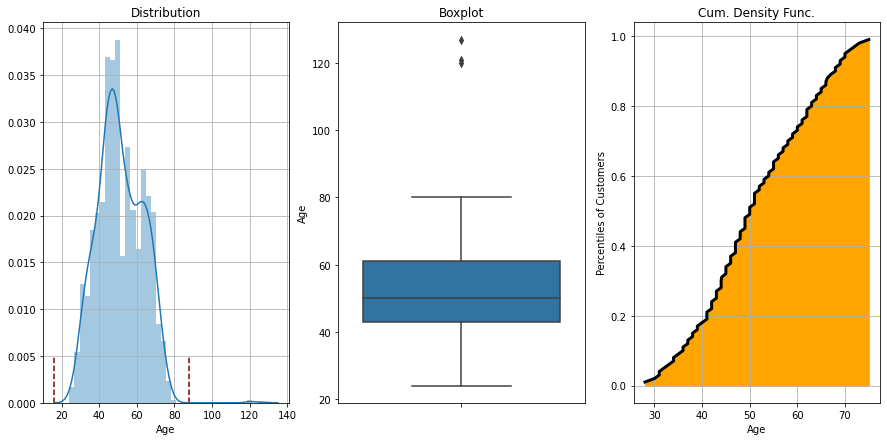

In [30]:
find_outliers(data, 'Age')

In [31]:
# number of customers who have age less than 50 years:
len(data[data['Age'] < 50])

1087

<p><ul>
<li>Age has gaussian like distribution where the peak seems to be at customers=50 years. This means, we have most of customers who are in their middle ages. The number of youngsters are almost neglegible and all of our customers age start with 30 years all way up to </li>
    <li>Half of the customers lie between the age of 30 to 50.</li>
</ul></p>

Range of Age is ---> 24 to 127
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.13537906137184114 %
Total Proportion of Outliers-> 0.13537906137184114 %


'Successfully Accessed'

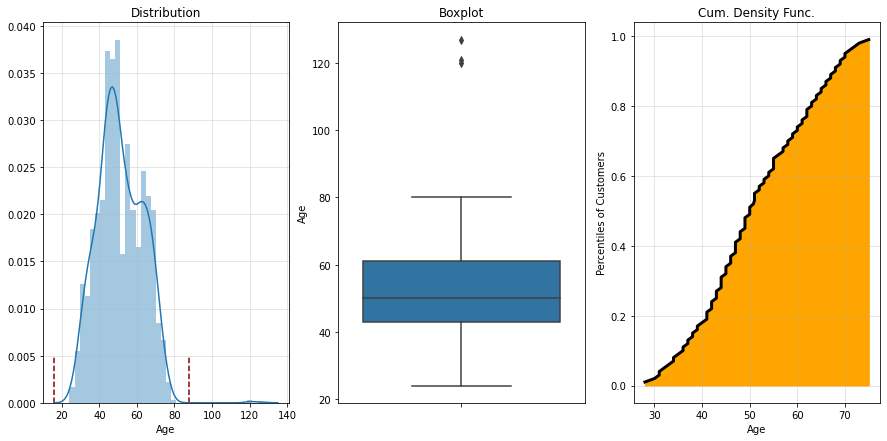

In [141]:
# since 'Income' has 24 missing values, thus consider the data fo which 'Income' is not null:
find_outliers(data[data['Income'].notnull()], 'Age')

<p><ul>'Age' and 'Income' have almost neglegible outliers and we can either use Winsorizing or we can directly use them as it is.</ul></p>

<h3>Required Transformations for each of the numerical feature:</h3>
<p>Remember, the transformations are done so as to get rid of the outliers and our regression model trained for predicting Income should not get deviated by the outliers.</p>
<p><strong>As far as Statistical Techniques are concerned, we do not care much about the distribution of the numerical features since the population distribution of the sample means is normally distributed.</strong></p>

<table>
    <tr>
    <th>Features whose outliers are treated using Winsorizing</th> <td><ul>
        <li>'MntWines'</li>
        <li>'Age</li>
        </ul>
    </tr>
    <tr>
    <th>Features whose outliers are treated using Logarithmic Transformation</th> <td><ul>
        <li>'MntFruits'</li>
        <li>'MntMeatProducts'</li>
        <li>'MntFishProducts'</li>
        <li>'MntSweetProducts'</li>
        <li>'MntGoldProducts'</li>
        </ul>
    </tr>
    <tr>
    <th>Features to be treated as it is</th> <td><ul>
        <li>''Recency</li>
        <li>'Income'</li>
        </ul>
    </tr>
    
</table>

In [75]:
# function for deatling with outliers through Winsorizing:
def winsorizing(data, feature):
    low_th, upp_th = compute_outliers(data, feature)
    
    # since in each of the feature, we have outliers towards the upper whisker, therefore:
    data[feature + '_new'] = np.where(data['Age'] > upp_th , upp_th, data['Age'])
    find_outliers(data, feature+'_new')
    
# function for dealing with outliers through Logarithmic Transformation:
def log_trans(data, feature):
    data[feature+'_log_new'] = np.log(data[feature]+1)
    find_outliers(data, feature+'_log_new')

<h3>Dealing with outliers using Winsorizing</h3>

Range of MntWines_new is ---> 24.0 to 127.0
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.13392857142857142 %
Total Proportion of Outliers-> 0.13392857142857142 %


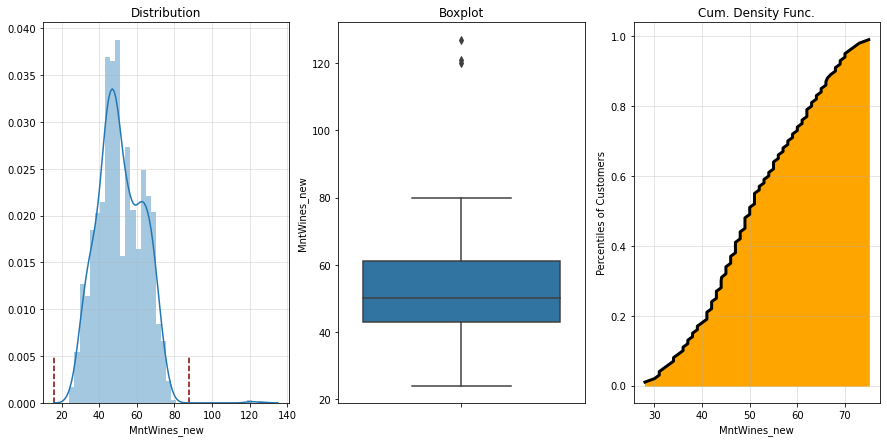

In [76]:
# All the transformed features will be kept in the same dataset.
# For MntWines:
winsorizing(data, 'MntWines')

Range of Age_new is ---> 24.0 to 88.0
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.0 %
Total Proportion of Outliers-> 0.0 %


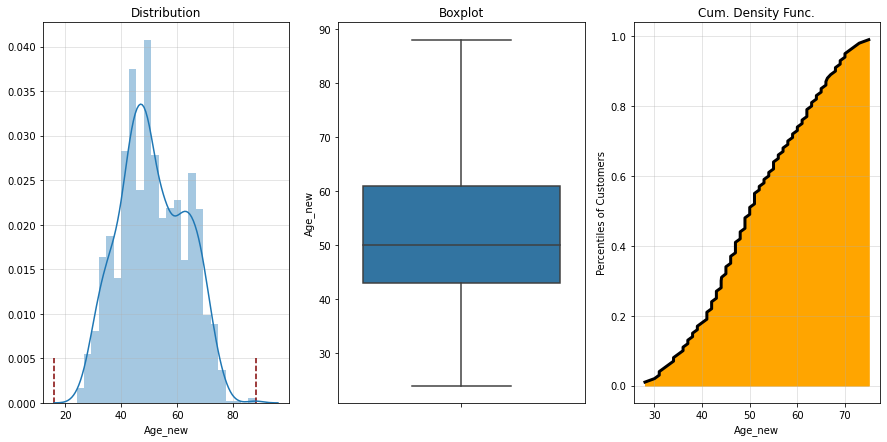

In [77]:
# for Age:
winsorizing(data, 'Age')

<h3>Dealing with Outliers Using Logarithmic Transformation:</h3>

Range of MntFruits_log_new is ---> 0.0 to 5.298317366548036
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.0 %
Total Proportion of Outliers-> 0.0 %


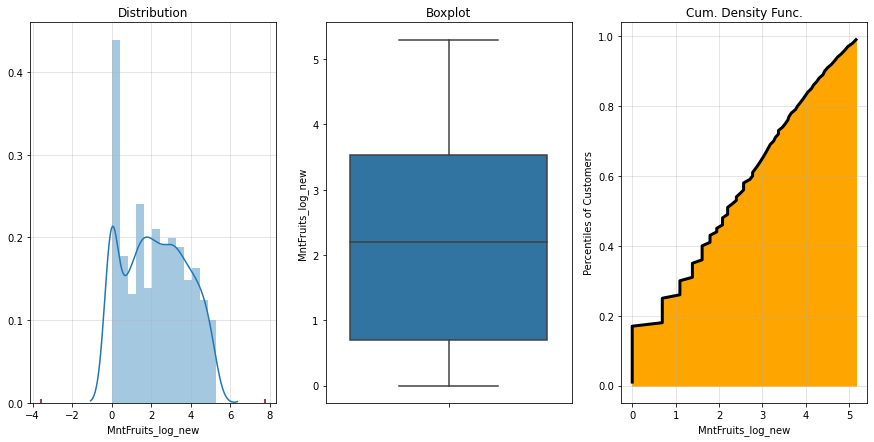

In [78]:
# for MntFruits:
log_trans(data, 'MntFruits')

Range of MntMeatProducts_log_new is ---> 0.0 to 7.453561871643373
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.0 %
Total Proportion of Outliers-> 0.0 %


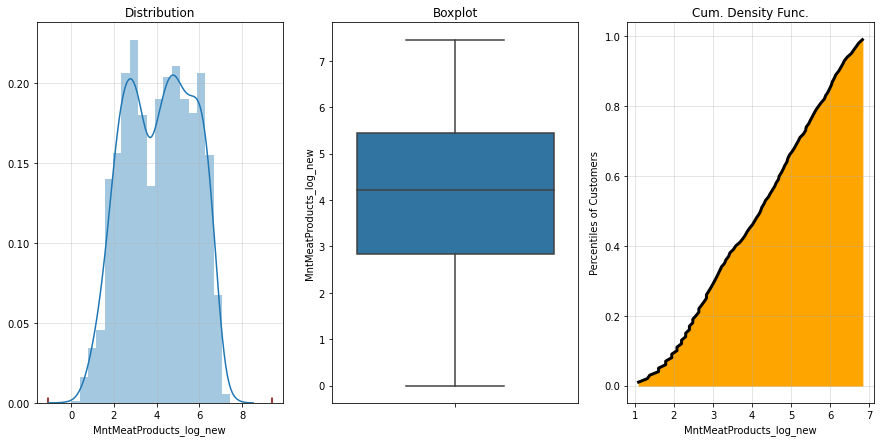

In [79]:
# for 'MntMeatProducts':
log_trans(data, 'MntMeatProducts')

Range of MntFishProducts_log_new is ---> 0.0 to 5.560681631015528
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.0 %
Total Proportion of Outliers-> 0.0 %


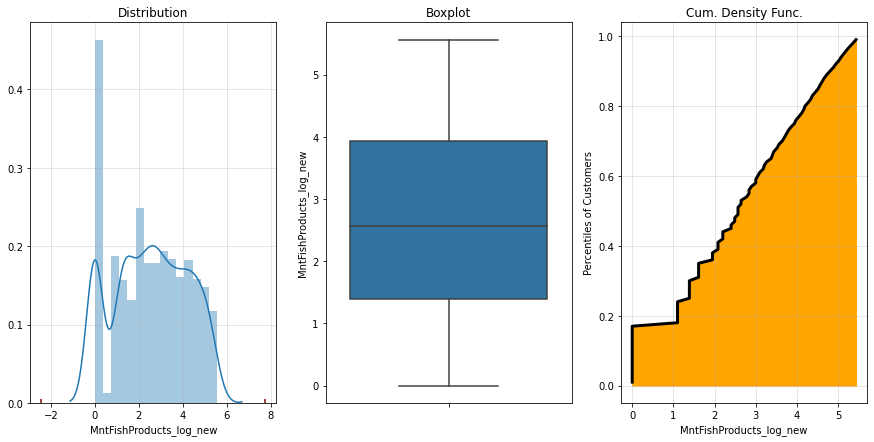

In [80]:
# for 'MntFishProducts'
log_trans(data, 'MntFishProducts')

Range of MntSweetProducts_log_new is ---> 0.0 to 5.575949103146316
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.0 %
Total Proportion of Outliers-> 0.0 %


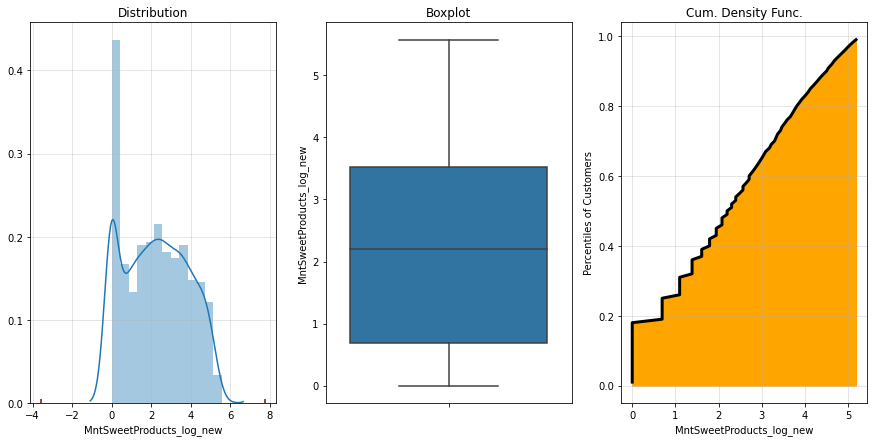

In [81]:
# for 'MntSweetProducts'
log_trans(data, 'MntSweetProducts')

Range of MntGoldProds_log_new is ---> 0.0 to 5.8944028342648505
Proportion of Outliers towards lower tail -> 0.0 %
Proportion of Outliers towards upper tail-> 0.0 %
Total Proportion of Outliers-> 0.0 %


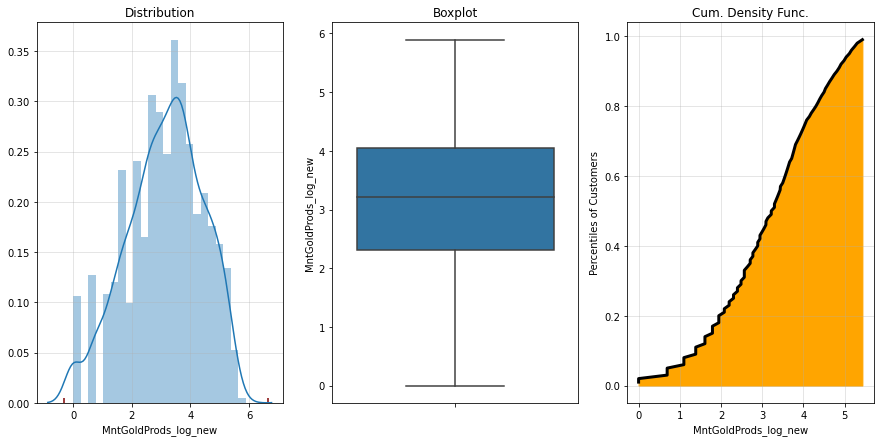

In [82]:
# for 'MntGoldProds'
log_trans(data, 'MntGoldProds')

<h3>Analysis of Above Transformations:</h3>
<p>We can observe that after the logarthmic transformations are applied to the numerical features which earlier had outliers more than 9%, now we have no outliers and they lie between the upper and lower thresholds. Hence, the outliers were dealt in a nice manner and now, I would like to investigate the relationships between the numerical features and categorica features so as to understand the most important categorical features which cause or explain the variance of numerical features.</p>
<p>Our aim is to consider the features which are important with respect to 'Income'. Remember 'Income' and 'Recency' are kept as it is.</p>

<h3>One Way ANOVA or T-test (2 Categories):</h3>
<p>Since we have a lot of categorical features, thus we need to see for which of the numerical features, a particular categorical feature explains its variance. For now, <strong>since we want to choose the categorical features which explain the variance of numerical features, hence we now would take into consideration the 'Income' feature as numerical feature. Hence, for each of the categorical feature, we inspect the p-value and based upon it, we take desicion of whether a particular categorical feature explains the variance of the numerical feature --> 'Income' </strong></p>
<p>Remember, the data for which the relationship is accounted should be the one which does not contain even a single value == 'Nan'.</p>

<h3>Important Note:</h3>
<p>The above function for T-test and ANOVA will be used in 2 cases:
<ul> 
    <li> <strong>When we want to consider a particlar categorical feature and all the numerical features so as to understand for which of the numerical features that categorical feature is rejecting the null i.e. has different means for different groups of that categorical feat.</strong></li>
    <li><strong>When we want to consider a particular numerical feature and all the categorical features to investigate for which of the categorical features, the null has been rejected for that particular numerical feature.</strong></li>
</ul>
    </p>
<p>Hence, for now, we would like to <strong>use it for the 2nd case where we need to compute the categorical features for which the null hypothesis has been rejected for 'Income', since we want to create a regression model for dealing with the missing values of 'Income'.</strong></p>

In [83]:
# Understanding the number of Categories in each of the categorical feature.
def num_categories(categorical_features):
    for feature in categorical_features:
        print(feature, '---->> Categories ---->>', data[feature].nunique())
        
num_categories(cat_feat)

Education ---->> Categories ---->> 5
Marital_Status ---->> Categories ---->> 8
Kidhome ---->> Categories ---->> 3
Teenhome ---->> Categories ---->> 3
AcceptedCmp3 ---->> Categories ---->> 2
AcceptedCmp4 ---->> Categories ---->> 2
AcceptedCmp5 ---->> Categories ---->> 2
AcceptedCmp1 ---->> Categories ---->> 2
AcceptedCmp2 ---->> Categories ---->> 2
Response ---->> Categories ---->> 2
Complain ---->> Categories ---->> 2
Country ---->> Categories ---->> 8


In [48]:
from scipy.stats import f_oneway

In [84]:
# for categorical features which have number of categories greater than 2, One Way ANOVA is used.
# But for categorical features which have number of categories=2, T-test is used,
# but the result of t-test and One Way ANOVA remains the same.

def one_way_anova_table(categorical_feature, data, num_features, cat_feats=None):
    results = {}
    
    # For a single num feature and multiple categorical features:
    if len(num_features) == 1:
        for cat_ft in cat_feats:
            data_each_group = []
            group_data = data.groupby(cat_ft)
            for cat_grp in data[cat_ft].unique():
                data_each_group.append(group_data.get_group(cat_grp)[num_features[0]])
            
            stats, p = f_oneway(*data_each_group)
            results[cat_ft] = (stats, p)
        
        results_df = np.transpose(pd.DataFrame(results))
        results_df.columns=['F-Statistic', 'P-Value']
        print('ANOVA Results for Numerical Feature-->', num_features[0])
        return results_df
    
    # for single categorical feature and multiple numerical features:
    else:
        grouped_data = data.groupby(categorical_feature)
        for num_ft in num_features:
            data_each_group = [] # because after every numerical feat, I want the new list
            for cat_grp in data[categorical_feature].unique():
                data_each_group.append(grouped_data.get_group(cat_grp)[num_ft])

            stats, p = f_oneway(*data_each_group)
            results[num_ft] = (stats, p)

        results_df = np.transpose(pd.DataFrame(results))
        results_df.columns=['F-Statistic', 'P-Value']
        print('ANOVA Results for Categorical Feature-->', categorical_feature)
        return results_df

In [85]:
# data which does not contains even a single null value. This will be our training
# data and the the data correspondig to the null is our test data.
intr_data = data[data['Income'].notnull()] # interested data

# Getting the names of the transformed numerical features:

intr_ft = [feat for feat in data.columns if 'new' in feat] # interested numerical features
intr_ft.extend(['Income', 'Recency'])
intr_ft

['MntWines_new',
 'Age_new',
 'MntFruits_log_new',
 'MntMeatProducts_log_new',
 'MntFishProducts_log_new',
 'MntSweetProducts_log_new',
 'MntGoldProds_log_new',
 'Income',
 'Recency']

In [86]:
# We use Chi-Square Test of Independence for inspecting whether the 2 categorical features are 
# dependent or not.
# It will allow us to select the categorical features which are dependent on another cat. feature: 
from scipy.stats import chi2_contingency

def categorical_dependency(cat_feature):
    result = {}  # will store data 
    # contingency table:
    for cat_feat_1 in cat_feat:
        if cat_feat_1 != cat_feature:
            cont_tab = pd.pivot_table(intr_data[[cat_feat_1, cat_feature]],
                           values=[cat_feat_1, cat_feature], 
                           columns=[cat_feat_1],
                           index=[cat_feature], 
                           aggfunc=len)

            # Nan Values in the Contingency Table donotes we do not have any of the observation common between those 
            # 2 categories of the Categorical Features.
            cont_tab_corr = np.where(cont_tab.isnull(), 0, cont_tab) # contingency table corrected
            chi2_val, p_val, dof, expected_freq_array = chi2_contingency(cont_tab_corr)
            result[cat_feat_1] = (chi2_val, p_val)
    
    result_df = np.transpose(pd.DataFrame(result))
    result_df.columns=['Chisquare Value', 'P-Value']
    print('Chi-Sqaure Test of Independence with respect to Categorical Feature -->{}'.format(cat_feature))
    return result_df

# Testing the function and computing the chi-square and p-values of 'Country' with other categorical features :
categorical_dependency('Country')

Chi-Sqaure Test of Independence with respect to Categorical Feature -->Country


,Chisquare Value,P-Value
Education,29.769451,0.374323
Marital_Status,87.319073,0.000624
Kidhome,22.839178,0.062937
Teenhome,7.230773,0.925449
AcceptedCmp3,4.902441,0.671868
AcceptedCmp4,6.491628,0.483654
AcceptedCmp5,5.614269,0.585439
AcceptedCmp1,2.288906,0.942137
AcceptedCmp2,5.435590,0.606964
Response,12.521193,0.084670


In [89]:
# for numerical feature-> 'Income'
# categorical feature -> all the categorical features:
# This table contains the p-values with respect to 'Income' and all the categorical features:

anova_table = one_way_anova_table(None, intr_data, ['Income'], cat_feats=cat_feat)
anova_table

ANOVA Results for Numerical Feature--> Income


,F-Statistic,P-Value
Education,27.739182,1.667728e-22
Marital_Status,0.910237,4.973063e-01
Kidhome,271.945135,2.499075e-106
Teenhome,0.603312,5.470871e-01
AcceptedCmp3,0.579362,4.466437e-01
AcceptedCmp4,77.933760,2.118751e-18
AcceptedCmp5,281.654242,1.348907e-59
AcceptedCmp1,183.736736,2.858503e-40
AcceptedCmp2,17.099341,3.679768e-05
Response,39.897169,3.225569e-10


<p>Choosing the categorical features which have<strong> p-values less than 0.05</strong>, since for those categorical features only,<strong> the null has been rejected for 'Income' i.e. these categorical features explain the variance of 'Income' </strong> and hence, these are the set of categorical features <strong>important for predicting 'Income'</strong>/p>

In [90]:
# Considering the categorical features for which the null hypothesis has been rejected which are 
# characterised by having a p-value less than 0.05.

imp_cat_table = anova_table[anova_table['P-Value']<0.05]
imp_cat_table

,F-Statistic,P-Value
Education,27.739182,1.667728e-22
Kidhome,271.945135,2.499075e-106
AcceptedCmp4,77.933760,2.118751e-18
AcceptedCmp5,281.654242,1.348907e-59
AcceptedCmp1,183.736736,2.858503e-40
AcceptedCmp2,17.099341,3.679768e-05
Response,39.897169,3.225569e-10


In [91]:
# important categorical features which explain or account the variance of 'Income'
imp_cat_income = list(imp_cat_table.index)
imp_cat_income

['Education',
 'Kidhome',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']

<p>These are the set of Categorical features which explain or account for the variance of 'Income', stored <strong>as a list --> imp_cat_feat</strong> and hence, we can go ahead and now choose the numerical features.</p>

<h3>Important Numerical Features:</h3>
<p>Since we have transformed maximum of the numerical features so as to remove the outliers of those numerical features, hence now we compute correlation with those transformed numerical features only and<strong> would not consider the original features since the original data contained outliers within them and now, the transformed features do not contain any outliers. Hence the regression model will be trained only on the transformed numerical features.</strong></p>

In [92]:
# we consider the numerical features which have correlation with 'Income' i.e. target feature 
# more than 0.3:

find_highly_corr_feat('Income', intr_ft, 0.3)

{'MntFruits_log_new': 0.46625861056451834,
 'MntMeatProducts_log_new': 0.6537337347185606,
 'MntFishProducts_log_new': 0.4452558902644673,
 'MntSweetProducts_log_new': 0.4433905859782517,
 'MntGoldProds_log_new': 0.3622994500541187}

In [93]:
# important numerical features which have pearson correlation higher than 0.3:

imp_num_income = list(find_highly_corr_feat('Income', intr_ft, 0.3).keys())
imp_num_income

['MntFruits_log_new',
 'MntMeatProducts_log_new',
 'MntFishProducts_log_new',
 'MntSweetProducts_log_new',
 'MntGoldProds_log_new']

<h3>Regression Model for predicting the missing values of 'Income':</h3>

In [94]:
# Number of Categories in categorical features:
num_categories(imp_cat_income)

Education ---->> Categories ---->> 5
Kidhome ---->> Categories ---->> 3
AcceptedCmp4 ---->> Categories ---->> 2
AcceptedCmp5 ---->> Categories ---->> 2
AcceptedCmp1 ---->> Categories ---->> 2
AcceptedCmp2 ---->> Categories ---->> 2
Response ---->> Categories ---->> 2


In [95]:
def input_data(data, imp_cat_feat, imp_num_feat, add_feat):
    
    # considering only the features which are given as imp_cat_feat and imp_num_feat:
    imp_feats = imp_cat_feat + imp_num_feat + add_feat
    data_new = data[imp_feats]
    
    # one hot encoding or dummy encoding for categorical features:
    for cat_feature in imp_cat_feat:
        for category in data_new[cat_feature].unique():
            data_new[cat_feature + ' ' +str(category)] = np.where(data_new[cat_feature]==category, 1, 0)
    
    
    x_train = data_new.drop(imp_cat_feat, axis=1)
    return x_train

In [146]:
# input data for income:

data_income = input_data(data, imp_cat_income, imp_num_income, ['Income'])
data_income.columns

c:\python\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Index(['MntFruits_log_new', 'MntMeatProducts_log_new',
       'MntFishProducts_log_new', 'MntSweetProducts_log_new',
       'MntGoldProds_log_new', 'Income', 'Education Graduation',
       'Education PhD', 'Education 2n Cycle', 'Education Master',
       'Education Basic', 'Kidhome 0', 'Kidhome 1', 'Kidhome 2',
       'AcceptedCmp4 0', 'AcceptedCmp4 1', 'AcceptedCmp5 0', 'AcceptedCmp5 1',
       'AcceptedCmp1 0', 'AcceptedCmp1 1', 'AcceptedCmp2 0', 'AcceptedCmp2 1',
       'Response 1', 'Response 0'],
      dtype='object')

<h3>Preprocessing Data:</h3>

In [147]:
from sklearn.preprocessing import MinMaxScaler 

# Creating training and test data:
test_data = data_income[data_income['Income'].isnull()].drop(['Income'], axis=1)
train_data = data_income[data_income['Income'].notnull()].drop(['Income'], axis=1)

# Creating labels of training and validation data i.e. which contains the non-null values of 'Income':
# Since the 'Income' values are of pretty large scale, hence I have taken logarithm of it: 
y_train_full = np.log(data_income[data_income['Income'].notnull()]['Income'])

# Scaling the training and test data:
# Creating an instance of MinMaxScaler class:
scaler = MinMaxScaler()

# Fitting and Transforming the features based upon the training data:
scaled_data_train = scaler.fit_transform(train_data)
train_scaled = pd.DataFrame(scaled_data_train, columns=train_data.columns)

# Transforming the features of test data fitted on training data:
scaled_data_test = scaler.transform(test_data)
test_scaled = pd.DataFrame(scaled_data_test, columns=test_data.columns)

# Creating the input features and labels of training data:
y_train = y_train_full[:2166]
x_train = train_scaled[:2166]

# Creating the Validation Data: (50 instances are there for validating the data)
y_val = y_train_full[-50:]
x_val = train_scaled[-50:]

# Setting the index of labels as the same as that of indep_features:
y_train.index = x_train.index
y_val.index = x_val.index

# Creating the input features and labels of test data:
x_test = test_scaled

In [148]:
print('Shape of Training Test and Validation Data')
print('============================================')
# Shape of Training Data
print('Train Data -->', x_train.shape, 'Train Labels -->', y_train.shape)

# Shape of Test Data
print('Test Data -->', x_test.shape)

# Shape of Validation Data
print('Validation Data -->', x_val.shape, 'Validation Labels -->', y_val.shape)


Shape of Training Test and Validation Data
Train Data --> (2166, 23) Train Labels --> (2166,)
Test Data --> (24, 23)
Validation Data --> (50, 23) Validation Labels --> (50,)


<h3>Fitting Data using Linear Regression Model:</h3>

In [149]:
# To get the significant predictors of 'Income', I train the LinearRegression model using Statsmodels module, since it also 
# gives the p-value which indicates the importance of each of the independent variables or input variables: 

import statsmodels.api as sm
model = sm.OLS(y_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     182.4
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:48:48   Log-Likelihood:                -664.13
No. Observations:                2166   AIC:                             1362.
Df Residuals:                    2149   BIC:                             1459.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
MntFruits_log_new            0.0348      0.039      0.894      0.371      -0.042       0.111
MntMeatProducts_log_new      1.4886      0.067     22.193      0.000       1.357       1.620
MntFishProducts_log_new     -0.0554      0.039     -1.417      0.157      -0.132       0.021
MntSweetProducts_log_new     0.0072      0.040      0.182      0.856      -0.071       0.085
MntGoldProds_log_new         0.0106      0.043      0.250      0.803      -0.073       0.094
Education Graduation         0.7133      0.014     50.608      0.000       0.686       0.741
Education PhD                0.8308      0.018     45.939      0.000       0.795       0.866
Education 2n Cycle           0.6927      0.022     31.284      0.000       0.649       0.736
Education Master             0.7725      0.019     41.533      0.000       0.736       0.809
Education Basic              0.2854      0.039      7.329      0.000       0.209       0.362
Kidhome 0                    1.1388      0.019     59.368      0.000       1.101       1.176
Kidhome 1                    1.0369      0.017     59.784      0.000       1.003       1.071
Kidhome 2                    1.1190      0.035     31.920      0.000       1.050       1.188
AcceptedCmp4 0               1.5831      0.017     95.193      0.000       1.550       1.616
AcceptedCmp4 1               1.7116      0.017     98.498      0.000       1.678       1.746
AcceptedCmp5 0               1.5863      0.017     93.844      0.000       1.553       1.619
AcceptedCmp5 1               1.7084      0.019     90.288      0.000       1.671       1.746
AcceptedCmp1 0               1.5937      0.017     93.686      0.000       1.560       1.627
AcceptedCmp1 1               1.7010      0.019     87.983      0.000       1.663       1.739
AcceptedCmp2 0               1.6201      0.030     54.511      0.000       1.562       1.678
AcceptedCmp2 1               1.6746      0.038     43.691      0.000       1.599       1.750
Response 1                   1.5881      0.014    115.721      0.000       1.561       1.615
Response 0                   1.7066      0.013    133.177      0.000       1.681       1.732
==============================================================================
Omnibus:                     1018.342   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28084.406
Skew:                          -1.632   Prob(JB):                         0.00
Kurtosis:                      20.336   Cond. No.                     4.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.58e-30. This might indicate that there are
strong multicol

In [150]:
# Remove the Insignificant Features from all the input set i.e. training, test and validation:

insig_feats = ['MntFruits_log_new', 'MntFishProducts_log_new', 'MntSweetProducts_log_new', 
               'MntGoldProds_log_new']

x_train = x_train.drop(insig_feats, axis=1)
x_val = x_val.drop(insig_feats, axis=1)
x_test = x_test.drop(insig_feats, axis=1)

In [151]:
# retraining the model after removing the insiginificant features:

model = sm.OLS(y_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     243.2
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:48:53   Log-Likelihood:                -665.35
No. Observations:                2166   AIC:                             1357.
Df Residuals:                    2153   BIC:                             1431.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
MntMeatProducts_log_new     1.4803      0.044     33.676      0.000       1.394       1.566
Education Graduation        0.7137      0.014     51.014      0.000       0.686       0.741
Education PhD               0.8319      0.017     50.258      0.000       0.799       0.864
Education 2n Cycle          0.6926      0.022     31.612      0.000       0.650       0.736
Education Master            0.7739      0.018     43.183      0.000       0.739       0.809
Education Basic             0.2840      0.038      7.504      0.000       0.210       0.358
Kidhome 0                   1.1395      0.019     60.207      0.000       1.102       1.177
Kidhome 1                   1.0376      0.017     60.041      0.000       1.004       1.071
Kidhome 2                   1.1189      0.035     32.033      0.000       1.050       1.187
AcceptedCmp4 0              1.5822      0.016     96.188      0.000       1.550       1.614
AcceptedCmp4 1              1.7138      0.017    101.430      0.000       1.681       1.747
AcceptedCmp5 0              1.5862      0.017     96.009      0.000       1.554       1.619
AcceptedCmp5 1              1.7098      0.019     90.649      0.000       1.673       1.747
AcceptedCmp1 0              1.5960      0.017     95.165      0.000       1.563       1.629
AcceptedCmp1 1              1.7000      0.019     88.486      0.000       1.662       1.738
AcceptedCmp2 0              1.6200      0.030     54.565      0.000       1.562       1.678
AcceptedCmp2 1              1.6761      0.038     44.062      0.000       1.601       1.751
Response 1                  1.5897      0.013    118.768      0.000       1.563       1.616
Response 0                  1.7063      0.013    134.129      0.000       1.681       1.731
==============================================================================
Omnibus:                     1014.325   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27746.727
Skew:                          -1.626   Prob(JB):                         0.00
Kurtosis:                      20.230   Cond. No.                     3.30e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Durbin Watson Test gives the value of around 2, which means there is no autocorrelation in our model which means that the error terms are not correlated with each other. From the above graph plotted between Residuals and predicted values, allows us to understand that the variance of the error terms are almost constant.

<h4>Training a Linear Regression Model to predict 'Income' based upon the Significant Predictors as chosen above:</h4>

In [152]:
# for training a linear regression model:
from sklearn.linear_model import LinearRegression

# for checking one of the assumptions of Linear Regression i.e. whether the residuals are independent or not i.e. No 
# AutoCorrelation is expected:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, 'Checking for Homoscedasticity')

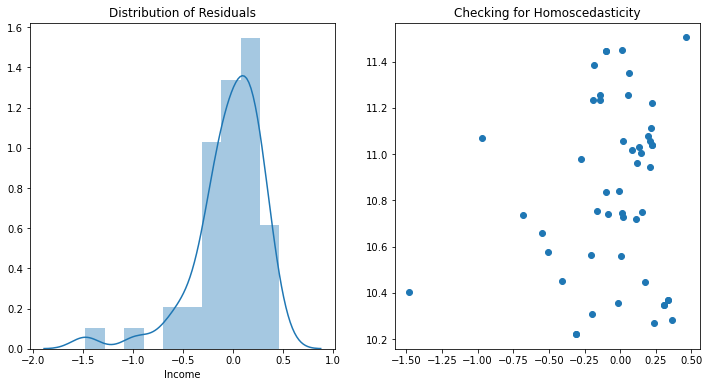

In [113]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(x_train, y_train)

# Predictions of Validation Data:

y_pred_val = lin_reg_mod.predict(x_val)
residuals = y_val-y_pred_val

# Assumption-1: Residuals should be normally distributed.
# Residuals are normally distributed:
plt.figure(figsize=(12, 6))
plt.subplot(121);
sns.distplot(residuals)
plt.title('Distribution of Residuals')

# Assumption-2: Homoscedasticity should be there i.e. the variance of the residuals
# should be constant over the whole data.
plt.subplot(122);
plt.scatter(residuals, y_pred_val)
plt.title('Checking for Homoscedasticity')

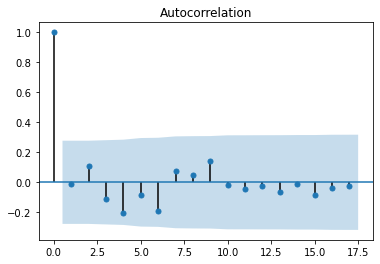

In [115]:
# Assumption-3: The residuals should not be correlated i.e. there should not be any correlation between the error terms:
plot_acf(residuals)
plt.show()

In [153]:
def mean_squared_error(y_true, y_pred):
    mse = (np.mean((y_true-y_pred)**2))
    return mse

# error of validation data:
mse_val = mean_squared_error(y_val, y_pred_val)
print('Mean Squared Error of Validation Data', mse_val)

# error of training data:
y_pred_train = lin_reg_mod.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error of Training Data', mse_train)

Mean Squared Error of Validation Data 0.12233258690496623
Mean Squared Error of Training Data 0.1082703164841075


<h3>Analysis of Linear Regression to handle missing values:</h3>
<p> <ul>
    <li>If we train the model without applying any transformation to 'Income', then <strong>R-Squared was 0.47 </strong>and after applying <strong> logarithmic transformation to 'Income', the R-Squared is increased upto 0.56.</strong></li>
    <li>If we look closely at the residuals, the distribution is more like Gaussian <strong> except at the point lying towards the extreme left which is making it a left-skewed</strong>. The plot of homoscedasticity is also looking nice <strong>if we remove the 2 leftmost points from it </strong>, then the points seem to be randomly distributed which we wanted. Thus, there are 2 outliers but apart from them, the <strong>residuals are distributed close to normal distribution.</strong> Hence, we sort of fulfil the 2 major assumptions of Linear Regression.</li>
    <li>From, the autocorrelation plot, we can directly see that there is not even a single bar lying out of the blue region (which is considered to be statistically 0) and hence, we can conclude that<strong> the error terms are completely independent which fulfils the 3rd assumption of Linear Regression.</strong></li>
    <li><strong>Remember, our aim here is to deal with the missing values, and as far predicting the missing values through this model is concerned, the model seems to be working more than good for us. Had our aim been to solely predict 'Income' for some business purpose, then we could have tried to preprocess more of the independent features so as to make the residuals more closer to normal distribution.</strong></li>
    <li>Thus, overall, except a few points which are lying towards the left side, the model seems to work really nice and as far as dealing with missing values are concerned, we can for sure use this model to predict the NaN values of 'Income'.</li>
    </ul> </p>

<h4>Predicting the Missing Values of 'Income' using the above trained Regression Model: </h4>

In [116]:
# predicting for the missing values of Income:

income_missing_val = list(lin_reg_mod.predict(x_test))
final_income_val = np.exp(list(y_train_full) + income_missing_val)
final_income_val

array([84835.        , 57091.        , 67267.        , ...,
       38808.95313909, 43976.30521471, 59408.19744776])

In [125]:
data_copy = data.copy() # creating a copy of the original data:

# data equivalent to the null values of 'Income':
null_income_data = data_copy[data_copy['Income'].isnull()]

# data equivalent to the non-null values of 'Income':
not_null_income_data = data_copy[data_copy['Income'].notnull()]

In [126]:
# completed data:
cmp_data = pd.concat([not_null_income_data, null_income_data], axis=0)
cmp_data['Income'] = final_income_val

In [124]:
cmp_data['Income'][:2216]

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2216, dtype: float64

In [123]:
not_null_income_data['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2216, dtype: float64

<h2>Section 2: Statistical Analysis of certain questions:</h2>

<h3>Question 1) Significant Predictors for 'NumStorePurchases':</h3>

In [129]:
# contains the transformed numerical features without outliers:

trans_num_feat = intr_ft + ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
trans_num_feat

['MntWines_new',
 'Age_new',
 'MntFruits_log_new',
 'MntMeatProducts_log_new',
 'MntFishProducts_log_new',
 'MntSweetProducts_log_new',
 'MntGoldProds_log_new',
 'Income',
 'Recency',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [130]:
# Regression Model:
# regression function does one-hot encoding for cat. features and runs a regression:
def regression(data, imp_cat_feat, imp_num_feat, target_feature):
    
    # considering only the features which are given as imp_cat_feat and imp_num_feat:
    imp_feats = imp_cat_feat + imp_num_feat
    data_new = data[imp_feats]
    
    # one hot encoding or dummy encoding for categorical features:
    for cat_feature in imp_cat_feat:
        for category in data_new[cat_feature].unique():
            data_new[cat_feature + ' ' +str(category)] = np.where(data_new[cat_feature]==category, 1, 0)
    
    x_train = data_new.drop(imp_cat_feat, axis=1)
    y_train = data[target_feature]
    #print('Independent Features', x_train.columns)
    
    model = sm.OLS(y_train, x_train)
    result = model.fit()
    return result

# Important Categorical Features with respect to a numerical target feature:

def best_cat_feats(data, lst_target_feat, cat_feats):
    anova_table = one_way_anova_table(None, data=data, num_features=lst_target_feat, cat_feats=cat_feats)
    imp_cat_tab = anova_table[anova_table['P-Value']<0.05]
    #print(imp_cat_tab)
    best_cat = list(imp_cat_tab.index)
    return best_cat

# Important Numerical Features with respect to the numerical target feature:

def best_num_feats(target_feature, num_feats, threshold):
    imp_num = find_highly_corr_feat(target_feature, num_feats, threshold)
    best_num = list(imp_num.keys())
    return best_num

# Combining all the above functions in a single function:
def reg_model(data, num_feats, cat_feats, lst_target_feature, threshold):
    imp_cat_feat = best_cat_feats(data, lst_target_feature, cat_feats)
    imp_num_feat = best_num_feats(lst_target_feature[0], num_feats, threshold)
    res_model = regression(data, imp_cat_feat, imp_num_feat, lst_target_feature[0])
    return res_model.summary()


In [131]:
# Regression Model Trained on Transformed Numerical features i.e. which do not contain outliers:
reg_model(cmp_data, trans_num_feat, cat_feat, ['NumStorePurchases'], 0.3)

ANOVA Results for Numerical Feature--> NumStorePurchases


c:\python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NumStorePurchases   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     149.7
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:30:09   Log-Likelihood:                -4895.2
No. Observations:                2240   AIC:                             9830.
Df Residuals:                    2220   BIC:                             9945.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
MntFruits_log_new            0.0939      0.048      1.971      0.049       0.000       0.187
MntMeatProducts_log_new      0.8855      0.068     13.027      0.000       0.752       1.019
MntFishProducts_log_new      0.0463      0.046      1.016      0.310      -0.043       0.136
MntSweetProducts_log_new     0.2014      0.046      4.388      0.000       0.111       0.291
MntGoldProds_log_new         0.0647      0.050      1.293      0.196      -0.033       0.163
Income                    1.238e-05   2.54e-06      4.869      0.000    7.39e-06    1.74e-05
NumWebPurchases              0.1390      0.021      6.589      0.000       0.098       0.180
NumCatalogPurchases         -0.0681      0.025     -2.713      0.007      -0.117      -0.019
Education Graduation        -0.1297      0.092     -1.410      0.159      -0.310       0.051
Education PhD                0.2927      0.118      2.480      0.013       0.061       0.524
Education 2n Cycle          -0.0453      0.142     -0.319      0.750      -0.323       0.233
Education Master             0.1546      0.121      1.274      0.203      -0.083       0.393
Education Basic             -0.2530      0.255     -0.991      0.322      -0.754       0.248
Kidhome 0                    0.6215      0.124      5.028      0.000       0.379       0.864
Kidhome 1                   -0.2795      0.112     -2.494      0.013      -0.499      -0.060
Kidhome 2                   -0.3227      0.225     -1.434      0.152      -0.764       0.119
AcceptedCmp3 0               0.3781      0.096      3.952      0.000       0.190       0.566
AcceptedCmp3 1              -0.3587      0.115     -3.119      0.002      -0.584      -0.133
AcceptedCmp4 0              -0.3937      0.107     -3.680      0.000      -0.603      -0.184
AcceptedCmp4 1               0.4130      0.115      3.592      0.000       0.188       0.638
AcceptedCmp5 0               0.2703      0.109      2.485      0.013       0.057       0.484
AcceptedCmp5 1              -0.2510      0.123     -2.045      0.041      -0.492      -0.010
AcceptedCmp1 0               0.1847      0.110      1.684      0.092      -0.030       0.400
AcceptedCmp1 1              -0.1654      0.125     -1.318      0.188      -0.411       0.081
AcceptedCmp2 0              -0.5305      0.190     -2.792      0.005      -0.903      -0.158
AcceptedCmp2 1               0.5498      0.243      2.261      0.024       0.073       1.027
==============================================================================
Omnibus:                       46.406   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.532
Skew:                           0.168   Prob(JB):                     8.85e-18
Kurtosis:                       3.854   Cond. No.                     

<h3>Explanation (Question 1)</h3>
<p> From the above regression model, we can infer that in order to predict 'NumStorePurchases', out of all the features in our data, these features are statistically significant predictors: 
<ul><strong>
    <li>MntMeatProducts_log_new</li>
        <li>MntSweetProducts_log_new</li>
    <li>Income</li>
    <li>NumWebPurchases</li>
    <li>NumCatalogPurchases</li>
    <li>Education</li>
    <li>Kidhome</li>
    <li>AcceptedCmp3</li>
    <li>AcceptedCmp4</li>
    <li>AcceptedCmp5</li>
    <li>AcceptedCmp2</li>
    </strong></ul>
    Hence if we want to create a regression model which predicts the 'NunStorePurchases' i.e. the number of store purchases so as to allocate services for them in the market.
</p>

<p><strong>Business Objective:</strong> If we could predict the number of purchases from store, then we can plan accordingly for the availability of goods and products, manage the supply chain, etc. It gives us tonnes of business implications to do this.</p>

<h3>Question 2) In terms of total purchase, does USA has more say than rest of the world?</h3>

In [132]:
# Preparing data for based upon the question:
data_copy = data.copy()
data_copy['TotalPurchases'] = data_copy['NumDealsPurchases'] + data_copy['NumWebPurchases'] +  data_copy['NumCatalogPurchases'] + data_copy['NumStorePurchases']
data_copy['US_only'] = np.where(data_copy['Country']=='US', 1, 0)
data_ques_2 = data_copy[['TotalPurchases', 'US_only']]

# T-Test :

from scipy.stats import ttest_ind
def t_test(data, cat_feature, num_feature):
    grouped_data = data.groupby(cat_feature)
    data_each_group = []
    group_mean = []
    
    for cat_grp in data[cat_feature].unique():
        data_each_group.append(grouped_data.get_group(cat_grp)[num_feature])
        group_mean.append((cat_grp, np.mean(data[data[cat_feature]==cat_grp][num_feature])))
    
    t_val, p_val = ttest_ind(*data_each_group)
    print('T-Value is --> {}'.format(t_val))
    print('P-Value is --> {}'.format(p_val))
    if p_val < 0.05:
        print('We reject the null')
        mean_df = pd.DataFrame(group_mean, columns=['Category', 'Mean']) 
        return mean_df
    else:
        print('We need to accept the null')
        
    
t_test(data_ques_2, 'US_only', 'TotalPurchases')

T-Value is --> -1.8049578917961837
P-Value is --> 0.07121562869350608
We need to accept the null


<h3>Explanation(Question 2):</h3>
<p>From the above analysis, we get p-value which is greater than 0.05 and hence, we need to accept the null hypothesis which <strong>means that there is no significant difference between the population mean of total purchases of USA as compared to the population mean of total purchases of rest of the world. Hence it means, there is no significant proof that we can say Total Purchase of USA is more than the rest of the World. Thus, from our analysis, we can say that the population mean of Total Purchase of USA and Rest of the World is same. </strong></p>
<p><strong>Business Objective-</strong> From our analysis, we can infer that the population average for total purchases in USA is no different than the rest of the world and<strong> this takes us to concluding that the market needs not to focuss only on USA but it also need to focuss on the Rest of The World since both of them have same population mean for Total Purchases. Hence, the marketting strategy should not only be confined to USA but equal efforts should be put for Rest of the World. It might be possible that Total Purchases in USA might differ largely from some other specific country but when we are considering USA versus Rest of the World, then we did not get any conclusive evidence to say that USA has more Total Purchases. Thus the maketting campaign needs to supply products equally well to the Rest of the World as to USA individually, since the population mean of Total Purchases are almost same.</strong></p>

<h3>Question 3) Test if the customers who spent above average on buying 'Gold Products' in last 2 years have more number of StorePurchases or not?</h3>

In [133]:
# Creating a new column year in the data:

year = []
for date in date_customer:
    year.append('20' + str(date[-2:]))

data['Year'] = year

# 2014 is the current year hence we want ot consider the customers who bought Gold in year 2014 and 2013.
data_2013 = data[data['Year']=='2013'] # data only of year 2013
data_2014 = data[data['Year']=='2014'] # data only of year 2013
data_2_years = pd.concat([data_2013, data_2014]) # contains data only for 2 years

# Computing the average amount of GoldProducts since we want to create a feature which contains 2 categories as follows:
avg_amnt_gold = np.mean(data_2_years['MntGoldProds'])
data_2_years['AboveAvgGold'] = np.where(data_2_years['MntGoldProds'] > avg_amnt_gold, 1, 0)

# Further, we want to see if numstorepurchases is affected by the people who buy gold.
data_ques_3 = data_2_years[['AboveAvgGold', 'NumStorePurchases']]
t_test(data_ques_3, 'AboveAvgGold', 'NumStorePurchases')

T-Value is --> -19.98671323114132
P-Value is --> 3.4611559850408396e-80
We reject the null


,Category,Mean
0,0,4.743142
1,1,7.762431


In [134]:
# Number of people who spend above average:
len(data_ques_3[data_ques_3['AboveAvgGold']==1])

543

In [135]:
# Number of people who spend below average:
len(data_ques_3[data_ques_3['AboveAvgGold']==0])

1203

<h3>Explanation (Question 3):</h3>
<p>From the above analysis, we can observe that the null has been rejected and this means that the population mean of numstorepurchases for two group of customers i.e. one who spends above average on GoldProducts and the other one who spends below averag are different. From the table, we can observe the people who spend above average on Gold Products for the past 2 years(represented by Category 1) have large mean of Number of Store Purchases which means people who spend above average on gold tend to have large number of purchases from the store i.e. they prefer to buy from Store.</p>
<p><strong>Business Objective:</strong> We can compute for the number of Customers who spend above average on buying Gold Products and based upon that we can further increase or decrease the supply of Gold Products in the Stores, since if the number of customers who spend above average on buying Gold, they would prefer to purchase them from Stores directly, hence the supply should be increased. Since in our case, the number of customers who spend below average are more than twice the number of customers who spend above average hence the supply should be reduced within the Stores since we do not have much customers who spend above average. Thus, the supply of Gold products should be increased for other channels i.e.     NumDealsPurchases','NumWebPurchases','NumCatalogPurchases' since we have more customers who spend less than the averge amount.</p>

<h3>Question 4)Test if Married PHd people spend more on fish? Also find the signifcant predictors which affect the 'MntFishProducts'.</h3>

In [136]:
# Prepraring the data for Question 4 which involves the Married PhD candidates:
education = list(data['Education'])
marital_stats = list(data['Marital_Status'])
married_phd = [] # stores the value either 1 or 0

# Creating a list which contains 1 if customer is married and Phd else 0:
for idx in range(len(data)):
    if education[idx]=='PhD' and marital_stats[idx]=='Married':
        married_phd.append(1)
    else:
        married_phd.append(0)

# creating the data for question 4:
data['married_phd'] = married_phd
data_ques_4 = data[['MntFishProducts', 'married_phd']]

# Testing if Married PhD people spend more on Fish or not:
# Category 1-> Married Phd Customers:
# Category 0-> Other Customers:

t_test(data_ques_4, 'married_phd', 'MntFishProducts')

T-Value is --> 2.792158172235668
P-Value is --> 0.005280260802335576
We reject the null


,Category,Mean
0,0,38.510742
1,1,27.015625


<h3>Explanation (Question 4):</h3>
<p>The T-test's result is significance which means the population mean of the amount spent on Fish Products is different for Married-Phd Customers and the other customers. The test is significant since p-value is less than alpha i.e. 0.05, hence it is significant the we can say the population mean of the amoiunt spent of fish is different for 2 categories. <strong>But we wanted to test if the Married Phd people i.e. customers belonging to Category-1 spend more on Fish Products or not. To our surprise, from the above table, we can observe that the sample mean of customers belonging to Category-0 have large mean of amount spent on Fish Products as compared to the customers belonging to Category-1. Thus, based upon the data, we can say there is no conclusive evidence that Married PhD customers spend more on fish and from the data, it seems the non-married and non-phd customers spend more on buying Fish Products since their mean is high.</strong></p>
<p><strong>Business Objective: Thus from our results, it seems that amount spent on Fish Products merely depends upon the liking of the customer irrespective of their marital status and education.</strong> Hence, had there been any relation between the 'MntFishProducts'--> 'Marital_Status' and 'Education', then the advertising team could use it as their weapon to attract the customers from that specific background i.e. Married PhD Customers: but in actual, no such relationship exist, thus the advertising teams cannot target any such group of people. </p>

<h4>Significant Predictors of 'MntFishProducts':</h4>

In [138]:
# Regression Model Trained on Original Numerical features i.e. which contain outliers:
reg_model(cmp_data, num_feat, cat_feat, ['MntFishProducts'], 0.3)

ANOVA Results for Numerical Feature--> MntFishProducts


c:\python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MntFishProducts   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     97.11
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:32:04   Log-Likelihood:                -11287.
No. Observations:                2240   AIC:                         2.263e+04
Df Residuals:                    2213   BIC:                         2.278e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
MntWines                   -0.0034      0.004     -0.847      0.397      -0.011       0.004
MntFruits                   0.3095      0.027     11.452      0.000       0.257       0.363
MntMeatProducts             0.0369      0.006      6.208      0.000       0.025       0.048
MntSweetProducts            0.2776      0.026     10.788      0.000       0.227       0.328
MntGoldProds                0.1066      0.018      5.862      0.000       0.071       0.142
NumCatalogPurchases         1.6609      0.455      3.653      0.000       0.769       2.553
NumStorePurchases           1.4817      0.361      4.104      0.000       0.774       2.190
Income                   8.818e-05   4.49e-05      1.962      0.050     3.9e-08       0.000
Education Graduation        0.9304      1.619      0.575      0.565      -2.244       4.104
Education PhD              -6.1940      1.987     -3.117      0.002     -10.091      -2.297
Education 2n Cycle          7.3100      2.508      2.915      0.004       2.393      12.227
Education Master           -1.9751      2.066     -0.956      0.339      -6.026       2.075
Education Basic             2.2563      4.389      0.514      0.607      -6.350      10.862
Marital_Status Divorced   -15.8403      5.652     -2.803      0.005     -26.924      -4.756
Marital_Status Single     -14.6977      5.441     -2.701      0.007     -25.369      -4.027
Marital_Status Married    -15.8565      5.349     -2.964      0.003     -26.346      -5.366
Marital_Status Together   -11.9636      5.411     -2.211      0.027     -22.575      -1.352
Marital_Status Widow       -7.9251      6.423     -1.234      0.217     -20.521       4.671
Marital_Status YOLO       -16.5568     23.850     -0.694      0.488     -63.327      30.214
Marital_Status Alone      -11.5540     19.677     -0.587      0.557     -50.142      27.034
Marital_Status Absurd      96.7216     24.001      4.030      0.000      49.655     143.788
Kidhome 0                   3.3766      2.217      1.523      0.128      -0.972       7.725
Kidhome 1                  -1.0870      2.043     -0.532      0.595      -5.092       2.918
Kidhome 2                   0.0380      4.016      0.009      0.992      -7.838       7.914
Teenhome 0                  7.2821      1.952      3.731      0.000       3.455      11.109
Teenhome 1                 -2.5628      1.993     -1.286      0.199      -6.471       1.345
Teenhome 2                 -2.3917      3.890     -0.615      0.539     -10.020       5.237
AcceptedCmp5 0              9.4888      2.112      4.493      0.000       5.347      13.630
AcceptedCmp5 1             -7.1612      2.564     -2.793      0.005     -12.189      -2.134
AcceptedCmp1 0             -6.5229      2.096     -3.113      0.002     -10.632      -2.413
AcceptedCmp1 1              8.8505      2.508  

In [139]:
# Regression Model Trained on Transformed Numerical features i.e. which do not contain outliers:
reg_model(cmp_data, trans_num_feat, cat_feat, ['MntFishProducts_log_new'], 0.3)

ANOVA Results for Numerical Feature--> MntFishProducts_log_new


c:\python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     MntFishProducts_log_new   R-squared:                       0.638
Model:                                 OLS   Adj. R-squared:                  0.635
Method:                      Least Squares   F-statistic:                     205.9
Date:                     Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                             17:32:16   Log-Likelihood:                -3171.7
No. Observations:                     2240   AIC:                             6383.
Df Residuals:                         2220   BIC:                             6498.
Df Model:                               19                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
MntFruits_log_new            0.2165      0.022      9.963      0.000       0.174       0.259
MntMeatProducts_log_new      0.3431      0.032     10.659      0.000       0.280       0.406
MntSweetProducts_log_new     0.2313      0.021     11.184      0.000       0.191       0.272
MntGoldProds_log_new         0.1002      0.023      4.389      0.000       0.055       0.145
Income                    2.288e-07   1.19e-06      0.192      0.848   -2.11e-06    2.57e-06
NumWebPurchases             -0.0155      0.010     -1.541      0.123      -0.035       0.004
NumCatalogPurchases          0.0217      0.012      1.886      0.059      -0.001       0.044
NumStorePurchases            0.0131      0.010      1.316      0.188      -0.006       0.033
Education Graduation        -0.0697      0.043     -1.629      0.104      -0.154       0.014
Education PhD               -0.3563      0.054     -6.564      0.000      -0.463      -0.250
Education 2n Cycle           0.1465      0.066      2.219      0.027       0.017       0.276
Education Master            -0.2796      0.056     -5.007      0.000      -0.389      -0.170
Education Basic              0.3757      0.119      3.153      0.002       0.142       0.609
Kidhome 0                    0.0083      0.058      0.145      0.885      -0.104       0.121
Kidhome 1                   -0.1385      0.051     -2.703      0.007      -0.239      -0.038
Kidhome 2                   -0.0532      0.106     -0.504      0.615      -0.260       0.154
Teenhome 0                   0.1843      0.050      3.721      0.000       0.087       0.281
Teenhome 1                  -0.1460      0.050     -2.913      0.004      -0.244      -0.048
Teenhome 2                  -0.2217      0.102     -2.165      0.030      -0.422      -0.021
AcceptedCmp5 0               0.0584      0.048      1.229      0.219      -0.035       0.152
AcceptedCmp5 1              -0.2418      0.061     -3.941      0.000      -0.362      -0.121
AcceptedCmp1 0              -0.1201      0.049     -2.442      0.015      -0.217      -0.024
AcceptedCmp1 1              -0.0633      0.062     -1.021      0.307      -0.185       0.058
Response 1                  -0.1746      0.045     -3.853      0.000      -0.264      -0.086
Response 0                  -0.0088      0.039     -0.222      0.824      -0.086       0.068
==============================================================================
Omnibus:                      429.173   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              984.505
Skew:                          -1.073   Prob(JB):                    1.65e-214
Kurtosis:                       5.438   Cond. No.                     4.99e+20
=============================

<h3>Analysis:</h3>
<p>There are 2 regression models which were trained: The first one includes the features as it is without treating their outliers and the 2nd model is trained on all the transformed numerical features where there are no outliers and hence, we can see that R-squared of 1st model is 0.534 where as R-Squared of 2nd Models is 0.634 i.e. the explainability and predictability of the target feature i.e. 'MntFishProducts' has been increased by 0.10% and the increment in R-Squared makes us confident that 2nd model is much much better than the 1st model and now we can consider all the features which are statistically significant in predicting the target feature and based upon their p-values, we will choose the importance of features.</p>
<h3>Significant Predictors of 'MntFishProducts'</h3>
<p><ul>
    <strong>
        <li>MntFruits_log_new</li>
        <li>MntMeatProducts_log_new</li>
        <li>MntSweetProducts_log_new	</li>
        <li>MntSweetProducts_log_new</li>
        <li>MntGoldProds_log_new</li>
        <li>Education</li>
        <li>Kidhome</li>
        <li>Teenhome</li>
        <li>AcceptedCmp5</li>
        <li>AcceptedCmp1</li>
        <li>Response</li>
        </strong>
    </ul></p>

<h3>Question 5) Is there any significant Relationship which exist between Geographical Regions and Success of Campaign?</h3>

In [140]:
# Using the Chi-Square Test of Independece:
categorical_dependency('Country')

Chi-Sqaure Test of Independence with respect to Categorical Feature -->Country


,Chisquare Value,P-Value
Education,29.769451,0.374323
Marital_Status,87.319073,0.000624
Kidhome,22.839178,0.062937
Teenhome,7.230773,0.925449
AcceptedCmp3,4.902441,0.671868
AcceptedCmp4,6.491628,0.483654
AcceptedCmp5,5.614269,0.585439
AcceptedCmp1,2.288906,0.942137
AcceptedCmp2,5.435590,0.606964
Response,12.521193,0.084670


<h3>Explanation (Ques 5):</h3>
<p>From the above table which contains the chi-square value and p-value, we can observe that p-value with respect to features-> $'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2' and 'Response' $,<strong> are greater than 0.05 i.e. the level of significance and hence we accept the null hypothesis which means there is no dependence between the Geographical Regions and the above mentioned features which correspond to the success of a campaign.</strong></p>
<p><strong>Business Objective:</strong> Thus, from the above Test of Independence (used to observe the dependence of 2 categorical features), we do not have any conclusive evidence that the success of a campaign depends on Geographical Region or Country. <strong>Hence this means the campaign instructors and decision makers should not exhaust all of their resources on campaigning for a particular country, rather they should allocate the resources for campaigning simultaneously on different countries with a solid plan, since the Country is not affecting the success of the Campaign.</strong></p>

<h2>Section 3: Visualizations: </h2>

<h3> 1) Most Successful Maketting Campaign:</h3>

In [155]:
# Features denoting the success of a campaign: 

cmp_feats = [feat for feat in cat_feat if 'Accepted' in feat]
cmp_feats.append('Response')
cmp_feats

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']

Text(0.5, 1.0, 'Success of Campaign')

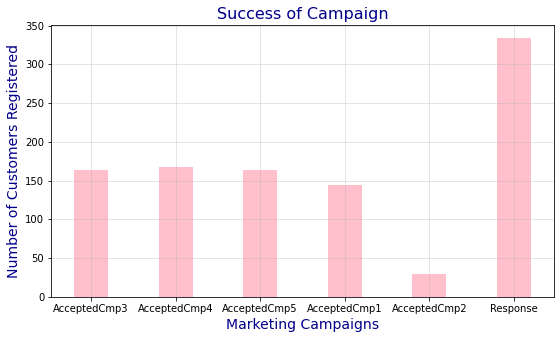

In [160]:
# Computing the number of customers who got themselves registered in respective campaigns:

success_cmp = {}
for feat in cmp_feats:
    freq = len(data[data[feat]==1])
    success_cmp[feat] = freq

# creating the values to be passed while creating a bar chart:
name_of_cmp = list(success_cmp.keys()) # name of campaign
num_cust = list(success_cmp.values()) # number of customers in each campaign

# plotting a bar chart:
plt.figure(figsize=(9, 5))
plt.grid(True, alpha=0.4)
plt.bar(x=name_of_cmp, height=num_cust,width=0.4, color='pink')
plt.ylabel('Number of Customers Registered', fontsize=14, color='darkblue')
plt.xlabel('Marketing Campaigns', fontsize=14, color='darkblue')
plt.title('Success of Campaign', fontsize=16, color='darkblue')

<h3>Analysis:</h3>
<p>From the above, Bar Chart, we can clearly observe that the <strong> last Campaign i.e. 'Response' has registered most of the customers i.e. around 343 </strong> which are almost double of the previous campaigns.</p>

<h3>2) Average Customer for our market:</h3>

<strong>An average customer of the market pays: 
        <ol> 
            <li>Less than 100 dollars for Wines.</li> 
            <li>Less than 10 dollars for Fruits.</li> 
            <li>Less than 50 dollars for MntMeatProducts.</li> 
            <li>Less than 10 dollars for Fish.</li> 
            <li>Less than 10 dollars for Sweet Products.</li> 
            <li>Less than 20 dollars for Gold Products.</li> 
        </ol>
        </strong>
        Refer to the analysis done in Section 1:

<h3>3) Which Products are performing the best?</h3>

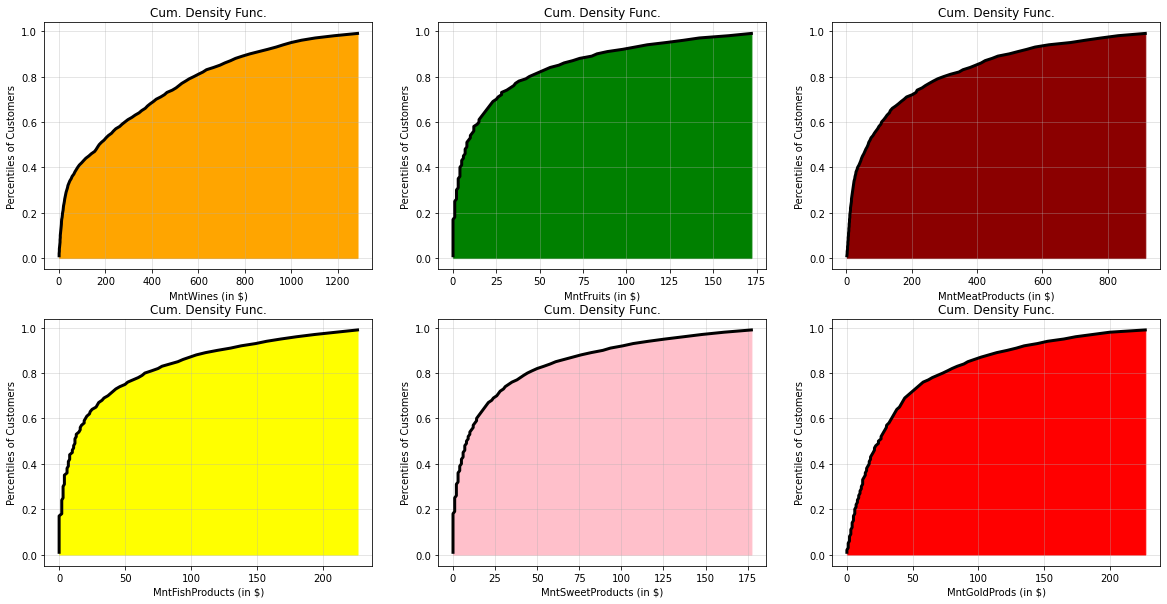

In [80]:
# Plotting the Cumulative Density Functions for each of the product:

# Getting the products out of all the numerical features:
products = num_feat[1:7]
products

# Storing the Cumulative Distributed Values for each of the product and storing it in a dictionary:  
cdf_dict = {}
for feat in products:
    cdf_dict[feat] = cum_density_func(data, feat)

# for plotting them, we convert the keys and values into list:
values_dict = list(cdf_dict.values())
keys_dict = list(cdf_dict.keys())
colors = ['orange', 'green', 'darkred', 'yellow', 'pink', 'red']

# plotting:
plt.figure(figsize=(20, 10))
for i in range(len(values_dict)):
    plt.subplot(2, 3, i+1);
    plt.plot(values_dict[i], np.arange(0.01, 1, 0.01), color='k', linewidth=3)
    plt.grid(True, alpha=0.4)
    plt.fill_between(values_dict[i], np.arange(0.01, 1, 0.01), color=colors[i])
    plt.xlabel(keys_dict[i] + ' (in $)')
    plt.ylabel('Percentiles of Customers')
    plt.title('Cum. Density Func.')


From the above Cumulative Density Functions of all the products, we can see that the product -> <strong>Wines is performing quite good since 60% percent of people are paying less than 300 dollars. </strong>, Where as if you observe <strong>'MntGoldProducts', which is generally expensive, but from the cdf, we can observe, 60% of the people are paying less than 40 dollars. Thus, it can certainly be analysed that Gold Products are not being sold according to their value, since they are generally expensive and most of the people are paying too low i.e. they are not interested to spend more on it.</strong> Similarly, we can derive conclusion for other products, but just deciding it based upon how much most of the customers are paying, is not giving us the underlying intuition. <strong>So, what I'll do is take the transformed numerical features which do not contain any outliers and compute the average amount a customer is paying for each of the product and then we can compute what proportion of customers are paying above average price and the proportion of customers who are paying below the average price. This analysis will be more beneficial since we'll get an idea about the average price a customer is willing to pay for each of the product and based upon it for what products, people are willing to spend higher than the average price. Thus, through this procedure, we can get an idea of the best performing products in the market.</strong>

In [81]:
# Considering the transformed features which do not have any outliers within them:

prod_trans = ['MntWines_new', 'MntFruits_log_new', 'MntMeatProducts_log_new', 
                  'MntFishProducts_log_new','MntSweetProducts_log_new', 'MntGoldProds_log_new']
prod_trans

['MntWines_new',
 'MntFruits_log_new',
 'MntMeatProducts_log_new',
 'MntFishProducts_log_new',
 'MntSweetProducts_log_new',
 'MntGoldProds_log_new']

In [82]:
# Computing the proportion of people buying a product above its avg price and below its avg price:

stats = []
for feat in prod_trans:
    avg = np.mean(data[feat])
    above_avg_prop = len(data[data[feat] > avg])/len(data)*100
    below_avg_prop = len(data[data[feat] < avg])/len(data)*100
    stats.append((above_avg_prop, below_avg_prop))
    
result = pd.DataFrame(stats, columns=['Above Average(%)', 'Below Average(%)'], index=prod_trans)
result

,Above Average(%),Below Average(%)
MntWines_new,44.866071,55.133929
MntFruits_log_new,48.928571,51.071429
MntMeatProducts_log_new,51.785714,48.214286
MntFishProducts_log_new,51.071429,48.928571
MntSweetProducts_log_new,49.419643,50.580357
MntGoldProds_log_new,52.857143,47.142857


Text(0.5, 1.0, 'Customers paying above or below the average price of product')

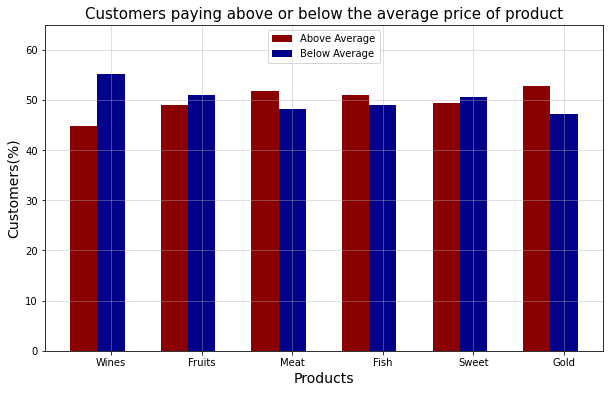

In [85]:
# Visualizing it through a bar chart:

labels = ['', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
plt.figure(figsize=(10, 6))
x = np.arange(len(result))
ax = plt.subplot(111)
plt.grid(True, alpha=0.5)
ax.bar(x-0.3, list(result['Above Average(%)']), width=0.3, align='center', label='Above Average', color='darkred')
ax.bar(x, list(result['Below Average(%)']), width=0.3, align='center',label='Below Average', color='darkblue')
ax.set_xticklabels(labels)
ax.set_ylim(0, 65)
ax.legend(loc='upper center')
ax.set_xlabel('Products', fontsize=14)
ax.set_ylabel('Customers(%)', fontsize=14)
ax.set_title('Customers paying above or below the average price of product', fontsize=15)

<h3>Analysis of Products:</h3>
<p><ul>
    <li>Wines, Fruits and Sweet Products are being sold more at below average price which means most of the customers are buying these products at a price worth below average. ALthough, it seems the percentage of people are pretty same i.e. there is equal proportion of customers who are paying below and above the average price. But, if we try to compare based on numbers then for products <strong>Wines, Fruits and Sweet Products, the proportion of them being sold at below average price is more prevelant</strong>. Hence, these products seem to underperform.</li>
<li>Thus, the products which <strong> seems to be working really good are MeatProducts, FishProducts and GoldProducts</strong> since, most of the customers are paying it above the average price of it.</li>  
</ul></p>

<h3>4) Which channel is underperforming?</h3>

In [86]:
# Total number of Channels which are there through which a customer buys a product:

channels = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channels

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

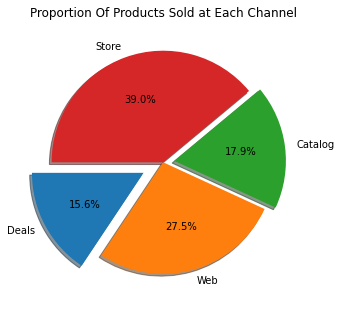

In [87]:
# Total Number of Products sold through each of the channels:
# This indicates the preference of the customers i.e. through which do most of the customers buy the 
# stuff.

total_prods_sold = {}
for channel in channels:
    total_prods_sold[channel] = sum(data[channel])

tot_prods_all_channels = sum(total_prods_sold.values())

for key in channels:
    total_prods_sold[key] = (sum(data[key])/tot_prods_all_channels)*100
total_prods_sold

# Plotting a pie chart:
labels = ['Deals', 'Web', 'Catalog', 'Store']
values = list(total_prods_sold.values())
explode = (0.2, 0, 0.1, 0)

fig1, ax1 = plt.subplots(figsize=(5, 6))
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('Proportion Of Products Sold at Each Channel')
plt.show()

<h3>Analysis of Channels:</h3>
<p>The proportion in pie chart represents the proportion of products being sold through each of the channel. It is clearly observed that<strong> people buy more frequently through 'StorePurchase' i.e. 39% of the total products are being purchased from store.</strong> Further, we can observe that the <strong>least proportion of products are sold through 'DealsPurchase' i.e. only 15.6% of total products and through 'CatalogPurchase' i.e. 17.9% of total products</strong>. Thus, <strong>'DealsPurchase' and 'CatalogPurchase' are the underperforming channels.</strong></p>